In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
prev_app = pd.read_csv(r"C:\Users\Swetha G\Downloads\New Loan\prev_app.csv")
app_data = pd.read_csv(r"C:\Users\Swetha G\Downloads\New Loan\app_data.csv")

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
app_data['YEARS_REGISTRATION'] = round(app_data['DAYS_REGISTRATION']/365,2)
app_data.drop('DAYS_REGISTRATION', inplace = True, axis = 1)

In [5]:
app_data['YEARS_ID_PUBLISH'] = round(app_data['DAYS_ID_PUBLISH']/365,2)
app_data.drop('DAYS_ID_PUBLISH', inplace = True, axis = 1)

In [6]:
app_data['YEARS_BIRTH'] = round(app_data['DAYS_BIRTH']/365,2)
app_data.drop('DAYS_BIRTH', inplace = True, axis = 1)

In [7]:
app_data['YEARS_EMPLOYED'] = round(app_data['DAYS_EMPLOYED']/365,2)
app_data.drop('DAYS_EMPLOYED', inplace = True, axis = 1)

In [8]:
numeric_app_data = app_data.select_dtypes(include = ['float', 'int'])

In [9]:
numeric_app_data.sample(2)

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
42707           103500.0    254700.0      17149.5         225000.0   
260028          574564.5   2250000.0      62005.5        2250000.0   

        REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
42707                     0.019101              4.0   
260028                    0.035792              1.0   

        YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
42707                      0.977798       0.225421   
260028                     0.981600       0.166700   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
42707                        0.97705        0.222193   
260028                       0.98160        0.166700   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
42707                       0.977746        0.225286        0.098657   
260028                      0.981600        0.166700        0.074700   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
42707                        0.0                       0.0   
260028                       7.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
42707                        0.0                       0.0   
260028                       6.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
42707                    139.0                         0.0   
260028                   997.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
42707                         0.0                         0.0   
260028                        0.0                         0.0   

        YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_BIRTH  YEARS_EMPLOYED  
42707                 2.86              2.90        38.28            4.22  
260028               22.99              3.55        23.76            5.28

In [10]:
numeric_app_data['AMT_INCOME_TOTAL'].min(), numeric_app_data['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

In [11]:
numeric_app_data['AMT_INCOME_TOTAL(L)'] = app_data['AMT_INCOME_TOTAL']/100000
numeric_app_data['AMT_CREDIT (L)'] = app_data['AMT_CREDIT']/100000
numeric_app_data['AMT_ANNUITY (L)'] = app_data['AMT_ANNUITY']/100000
numeric_app_data['AMT_GOODS_PRICE (L)'] = app_data['AMT_GOODS_PRICE']/100000

In [12]:
numeric_app_data.drop('AMT_INCOME_TOTAL', inplace = True, axis = 1)

In [13]:
numeric_app_data.drop(['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'], inplace = True, axis = 1)

In [14]:
numeric_app_data.sample(2)

REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
66002                    0.026392              2.0   
78842                    0.032561              2.0   

       YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
66002                       0.9876         0.1250   
78842                       0.9965         0.3167   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
66002                        0.9826          0.0417   
78842                        0.9965          0.1667   

       YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
66002                        0.9876          0.1250          0.0032   
78842                        0.9965          0.1667          0.0331   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
66002                       4.0                       0.0   
78842                       1.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
66002                       4.0                       0.0   
78842                       1.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
66002                   157.0                         0.0   
78842                  1512.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
66002                        0.0                         0.0   
78842                        0.0                         0.0   

       YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_BIRTH  YEARS_EMPLOYED  \
66002               11.34              0.44        38.77           12.70   
78842                4.75              1.08        46.13            2.68   

       AMT_INCOME_TOTAL(L)  AMT_CREDIT (L)  AMT_ANNUITY (L)  \
66002                1.125         4.77000          0.26766   
78842                2.700         8.14041          0.23931   

       AMT_GOODS_PRICE (L)  
66002                4.770  
78842                6.795

In [15]:
bins = [0,1,2,3,4,5,6,7,8,9,10,1170]
Credit_bins = ['0L-1L',' 1L-2L',' 2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L and above']

In [16]:
numeric_app_data['AMT_INCOME_TOTAL(L)'] = pd.cut(numeric_app_data['AMT_INCOME_TOTAL(L)'], bins, labels = Credit_bins)

In [17]:
numeric_app_data.sample(2)

REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
160210                    0.028663              2.0   
283089                    0.008474              2.0   

        YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
160210                       0.9861         0.3333   
283089                       0.9901         0.1667   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
160210                        0.9861          0.3333   
283089                        0.9901          0.1667   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
160210                        0.9861          0.3333          0.0664   
283089                        0.9901          0.1667          0.0697   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
160210                       1.0                       1.0   
283089                       0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
160210                       1.0                       1.0   
283089                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
160210                  1064.0                         0.0   
283089                     0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
160210                        0.0                         0.0   
283089                        0.0                         0.0   

        YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_BIRTH  YEARS_EMPLOYED  \
160210                9.89              5.38        50.47            5.95   
283089                2.03              1.84        47.02            9.12   

       AMT_INCOME_TOTAL(L)  AMT_CREDIT (L)  AMT_ANNUITY (L)  \
160210               1L-2L            5.40          0.27000   
283089               2L-3L           11.25          0.36423   

        AMT_GOODS_PRICE (L)  
160210                 5.40  
283089                11.25

In [18]:
bins = [0,1,2,3,4,5,6,7,8,9,10,41]
Credit_bins = ['0L-1L',' 1L-2L',' 2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L and above']

In [19]:
numeric_app_data['AMT_CREDIT (L)'] = pd.cut(numeric_app_data['AMT_CREDIT (L)'], bins, labels = Credit_bins)

In [20]:
bins = [0,1,2,3,4,5,6,7,8,9,10,41]
Credit_bins = ['0L-1L',' 1L-2L',' 2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L and above']

In [21]:
numeric_app_data['AMT_GOODS_PRICE (L)'] = pd.cut(numeric_app_data['AMT_GOODS_PRICE (L)'], bins, labels = Credit_bins)

In [22]:
numeric_app_data.sample(2)

REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
100734                    0.046220              3.0   
116407                    0.006305              2.0   

        YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
100734                     0.977788       0.227031   
116407                     0.976200       0.125000   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
100734                      0.977093         0.22236   
116407                      0.976200         0.12500   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
100734                      0.977772        0.226487        0.105223   
116407                      0.976200        0.125000        0.037900   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
100734                       2.0                       0.0   
116407                       0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
100734                       2.0                       0.0   
116407                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
100734                   730.0                         0.0   
116407                  1566.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
100734                        0.0                         0.0   
116407                        0.0                         0.0   

        YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_BIRTH  YEARS_EMPLOYED  \
100734               11.48              6.79        35.43            1.56   
116407               13.48             11.38        43.07           11.36   

       AMT_INCOME_TOTAL(L) AMT_CREDIT (L)  AMT_ANNUITY (L) AMT_GOODS_PRICE (L)  
100734               2L-3L  10L and above         0.621810       10L and above  
116407               0L-1L          3L-4L         0.137385               3L-4L

In [23]:
numeric_app_data['AMT_INCOME_TOTAL(L)'].value_counts()

 1L-2L           155898
 2L-3L            65176
0L-1L             63698
3L-4L             14676
4L-5L              5361
5L-6L              1095
6L-7L               869
8L-9L               298
10L and above       250
7L-8L               162
9L-10L               28
Name: AMT_INCOME_TOTAL(L), dtype: int64

In [24]:
numeric_app_data['AMT_CREDIT (L)'].value_counts()

 2L-3L           54813
10L and above    49985
5L-6L            34232
4L-5L            32038
 1L-2L           30140
3L-4L            26338
6L-7L            24049
8L-9L            21792
7L-8L            19193
9L-10L            8927
0L-1L             6004
Name: AMT_CREDIT (L), dtype: int64

# UNIVARIATE ANALYSIS

In [25]:
categoric_app_data = app_data.select_dtypes(exclude = ['float', 'int'])
categoric_app_data.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
93877       209011       0         Cash loans           F            N   
249774      389001       0         Cash loans           F            N   
220775      355755       0         Cash loans           M            N   
177232      305381       0         Cash loans           F            Y   
25959       130185       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
93877                Y             0   Unaccompanied  Commercial associate   
249774               Y             0   Unaccompanied  Commercial associate   
220775               Y             0   Unaccompanied  Commercial associate   
177232               Y             0   Unaccompanied               Working   
25959                Y             0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
93877                Higher education               Married   
249774               Higher education                 Widow   
220775  Secondary / secondary special               Married   
177232               Higher education  Single / not married   
25959   Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  FLAG_EMP_PHONE        OCCUPATION_TYPE  \
93877   House / apartment               1            Accountants   
249774  House / apartment               1         Cleaning staff   
220775  House / apartment               1          Cooking staff   
177232  House / apartment               1  High skill tech staff   
25959   House / apartment               1               Laborers   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
93877                      2                            2   
249774                     2                            2   
220775                     2                            2   
177232                     3                            3   
25959                      2                            2   

       WEEKDAY_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
93877                    SATURDAY                           0   
249774                   THURSDAY                           0   
220775                    TUESDAY                           0   
177232                  WEDNESDAY                           0   
25959                      MONDAY                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
93877                            0                            0   
249774                           0                            0   
220775                           0                            0   
177232                           0                            0   
25959                            1                            1   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
93877                        0                       0   
249774                       0                       0   
220775                       0                       1   
177232                       0                       0   
25959                        0                       1   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE EMERGENCYSTATE_MODE  \
93877                         0          Legal Services                  No   
249774                        0                    Bank                  No   
220775                        1       Industry: type 11             Unknown   
177232                        0  Business Entity Type 2                  No   
25959                         1  Business Entity Type 3             Unknown   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  
93877                 1                0  
249774                0                1  
220775                1                0  
177232                1                0  
25959                 1                0

In [26]:
categoric_app_data.drop('SK_ID_CURR', inplace = True, axis = 1)

In [27]:
categoric_app_data['AMT_CREDIT (L)'] = numeric_app_data['AMT_CREDIT (L)']
categoric_app_data['AMT_ANNUITY (L)'] = numeric_app_data['AMT_ANNUITY (L)']
categoric_app_data['AMT_GOODS_PRICE (L)'] = numeric_app_data['AMT_GOODS_PRICE (L)']
categoric_app_data['AMT_INCOME_TOTAL(L)'] = numeric_app_data['AMT_INCOME_TOTAL(L)']

In [28]:
categoric_app_data.sample(2)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
158683       0         Cash loans           M            N               Y   
244017       0         Cash loans           F            Y               Y   

        CNT_CHILDREN NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
158683             0   Unaccompanied               Working   
244017             1   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
158683  Secondary / secondary special            Married  House / apartment   
244017               Higher education            Married  House / apartment   

        FLAG_EMP_PHONE OCCUPATION_TYPE  REGION_RATING_CLIENT  \
158683               1        Laborers                     2   
244017               1        Managers                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
158683                            2                     MONDAY   
244017                            3                   SATURDAY   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
158683                           0                           1   
244017                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
158683                            1                       0   
244017                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
158683                       1                        1   
244017                       1                        1   

             ORGANIZATION_TYPE EMERGENCYSTATE_MODE  FLAG_DOCUMENT_3  \
158683  Business Entity Type 2                  No                1   
244017  Business Entity Type 3                  No                1   

        FLAG_DOCUMENT_6 AMT_CREDIT (L)  AMT_ANNUITY (L) AMT_GOODS_PRICE (L)  \
158683                0          2L-3L         0.116190               2L-3L   
244017                0  10L and above         0.427905               8L-9L   

       AMT_INCOME_TOTAL(L)  
158683               2L-3L  
244017               1L-2L

In [29]:
counts = categoric_app_data['TARGET'].value_counts()
print(counts.keys().to_list())
print(counts.to_list())

[0, 1]
[282686, 24825]


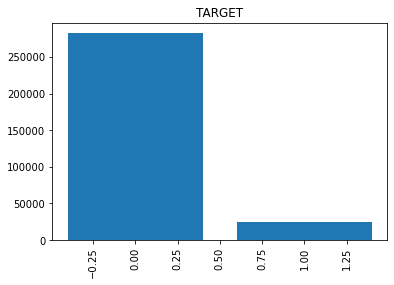

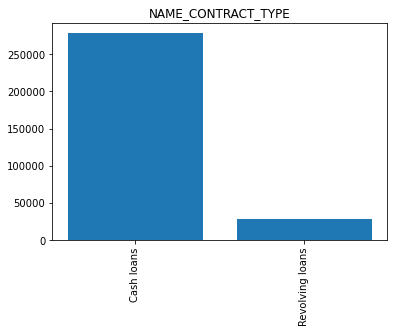

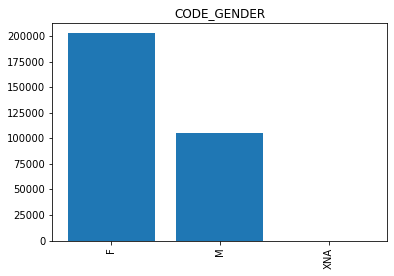

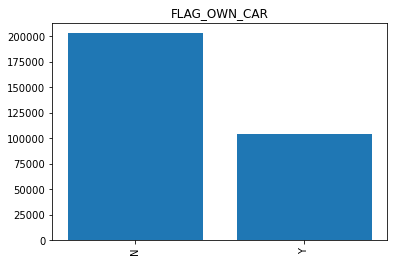

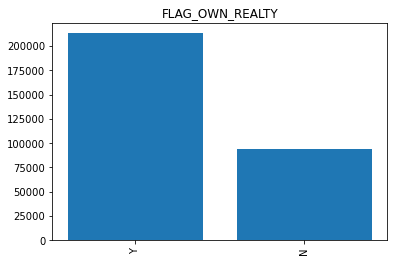

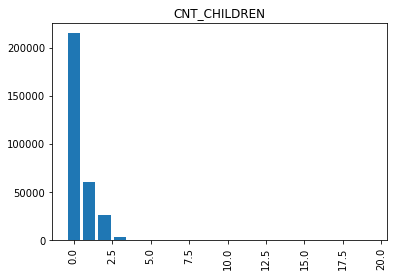

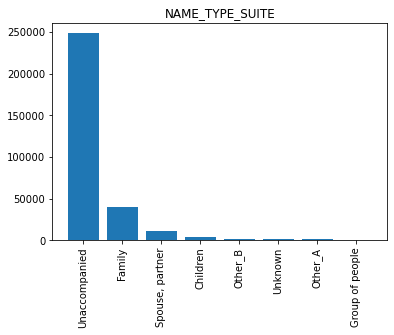

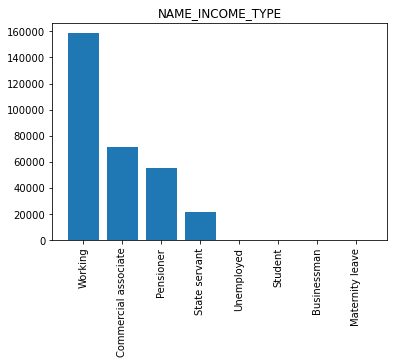

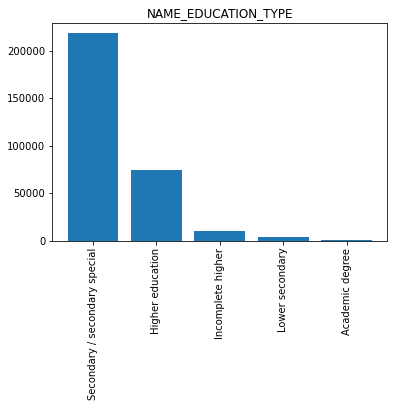

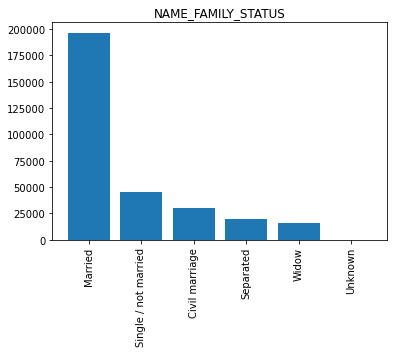

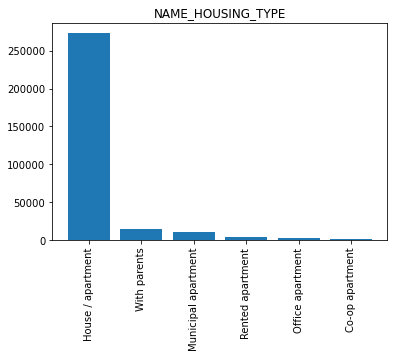

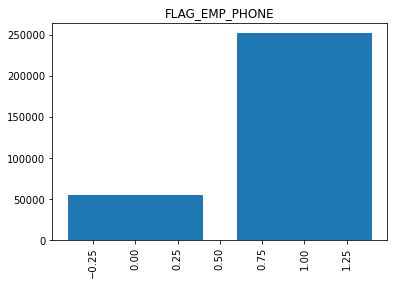

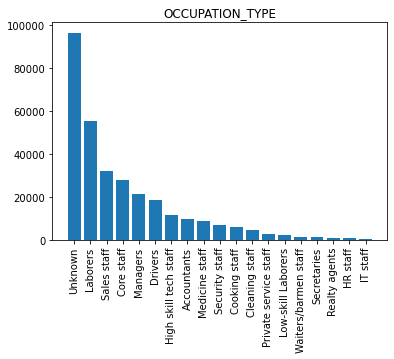

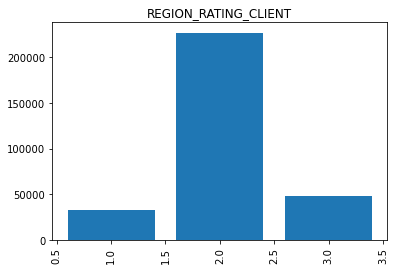

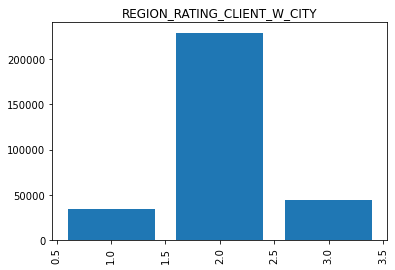

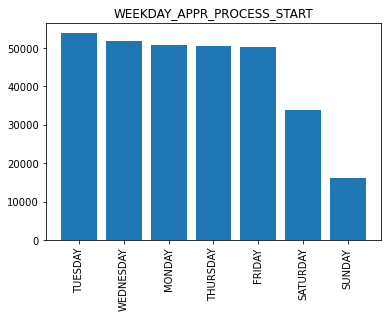

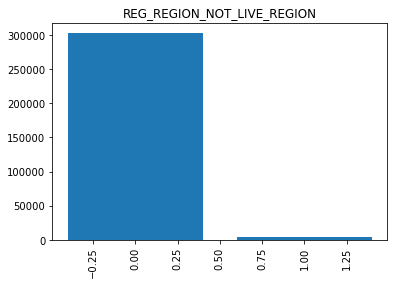

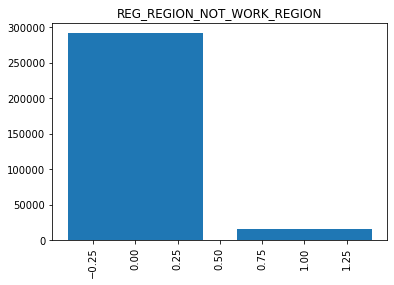

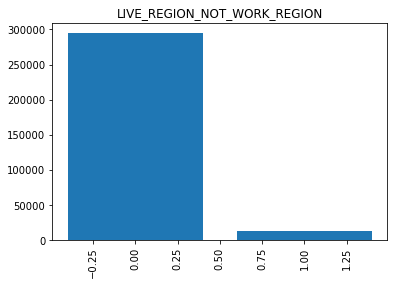

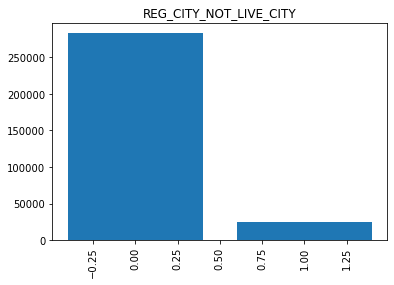

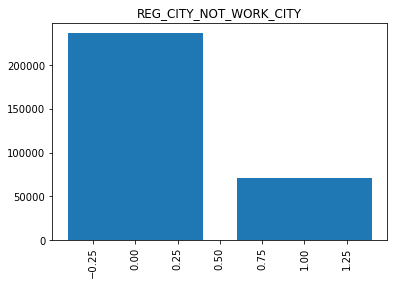

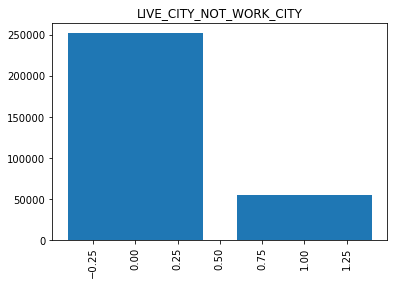

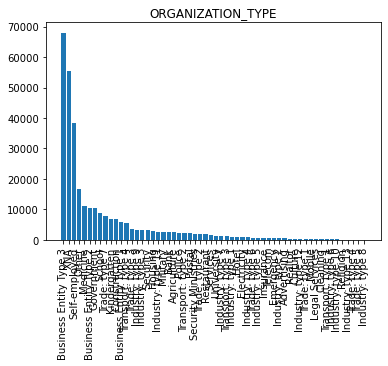

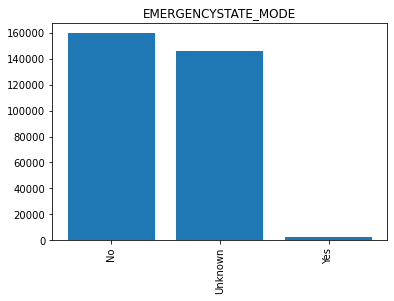

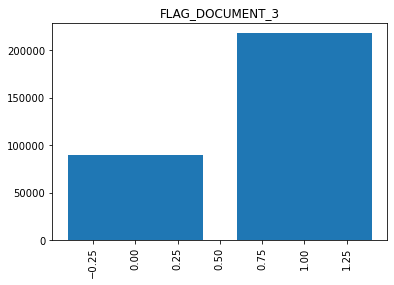

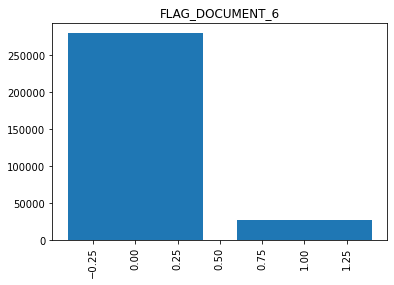

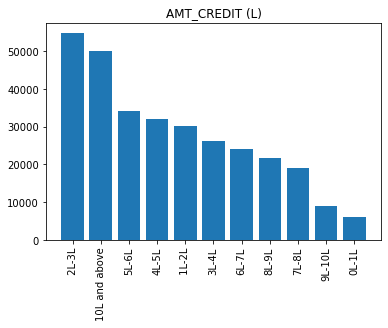

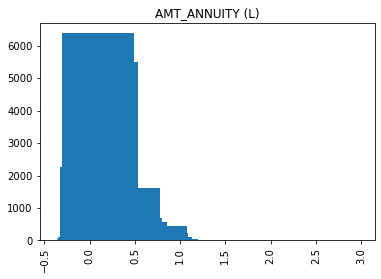

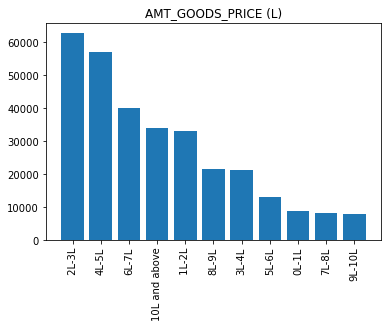

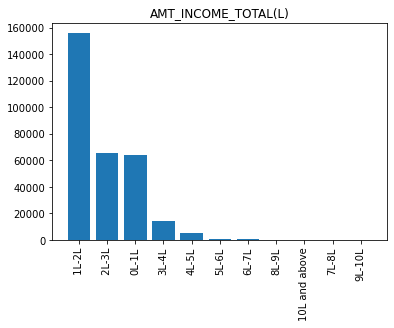

In [30]:
for col in categoric_app_data.columns:
    counts = categoric_app_data[col].value_counts()
    plt.title(col)
    plt.bar(x = counts.keys().to_list(), height = counts.to_list())
    plt.xticks(rotation = 90)
    plt.show()

In [31]:

numeric_app_data.sample(5)

REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
62481                     0.020713              4.0   
44754                     0.031329              2.0   
290286                    0.031329              2.0   
143221                    0.026392              1.0   
65453                     0.006305              2.0   

        YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
62481                      0.986600       0.333300   
44754                      0.979100       0.041700   
290286                     0.977711       0.225796   
143221                     0.980600       0.333300   
65453                      0.977741       0.226287   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
62481                       0.986600         0.33330   
44754                       0.979100         0.04170   
290286                      0.977045         0.22227   
143221                      0.980600         0.33330   
65453                       0.976951         0.22230   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
62481                       0.986600        0.333300        0.146900   
44754                       0.979100        0.041700        0.014700   
290286                      0.977745        0.225526        0.101415   
143221                      0.980600        0.333300        0.247800   
65453                       0.977776        0.225914        0.102664   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
62481                        6.0                       0.0   
44754                        0.0                       0.0   
290286                       0.0                       0.0   
143221                       3.0                       0.0   
65453                        0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
62481                        6.0                       0.0   
44754                        0.0                       0.0   
290286                       0.0                       0.0   
143221                       3.0                       0.0   
65453                        0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
62481                   2094.0                         0.0   
44754                    790.0                         0.0   
290286                  1806.0                         0.0   
143221                  1561.0                         0.0   
65453                    167.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
62481                         0.0                         0.0   
44754                         0.0                         0.0   
290286                        0.0                         0.0   
143221                        0.0                         0.0   
65453                         0.0                         0.0   

        YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_BIRTH  YEARS_EMPLOYED  \
62481                 7.40             11.01        38.37            4.53   
44754                13.48              3.42        48.53            4.59   
290286               31.89              8.50        53.64            3.44   
143221               30.44              1.52        46.58           17.09   
65453                 6.66              6.74        51.99         1000.67   

       AMT_INCOME_TOTAL(L) AMT_CREDIT (L)  AMT_ANNUITY (L) AMT_GOODS_PRICE (L)  
62481                3L-4L          8L-9L         0.306900               7L-8L  
44754                0L-1L  10L and above         0.316530               8L-9L  
290286               0L-1L          1L-2L         0.066600               0L-1L  
143221               0L-1L          1L-2L         0.074880               1L-2L  
65453                0L-1L          8L-9L         0.260865               6L-7L

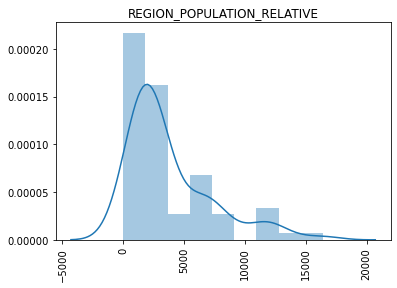

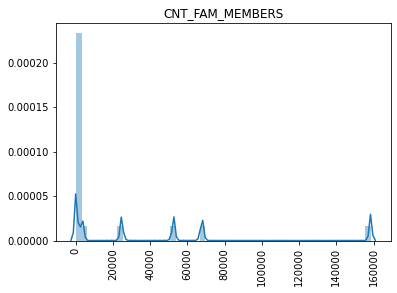

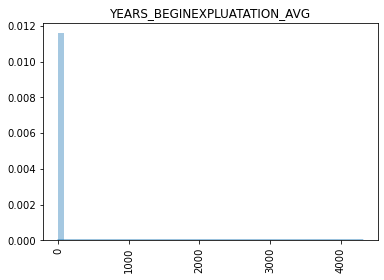

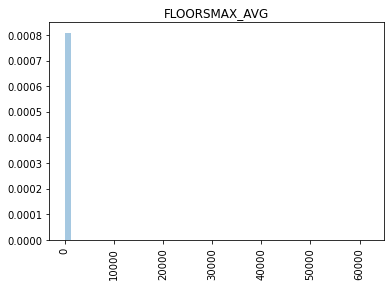

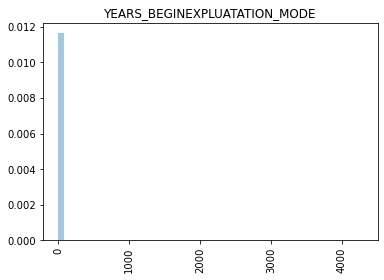

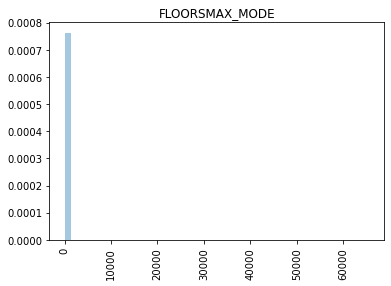

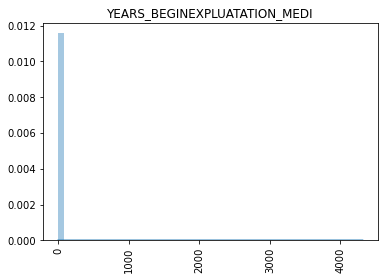

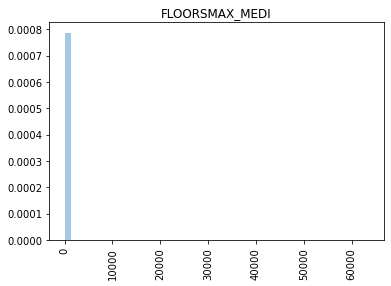

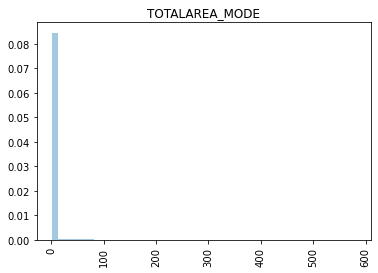

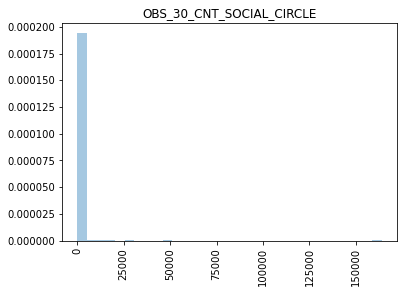

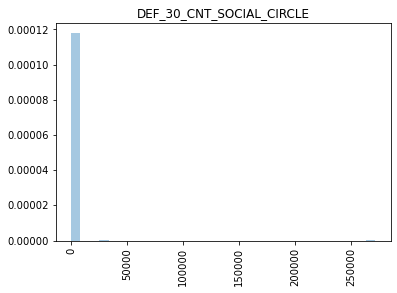

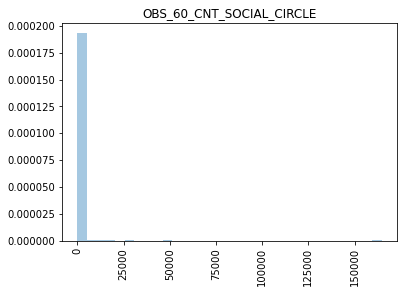

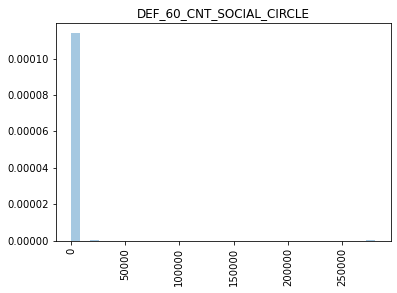

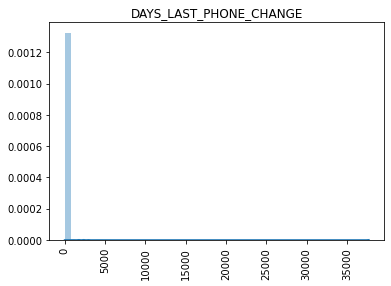

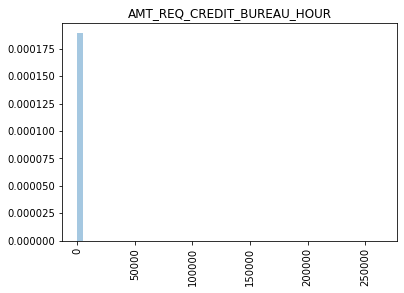

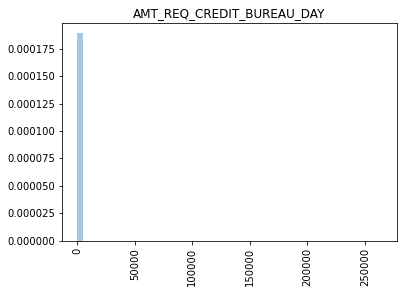

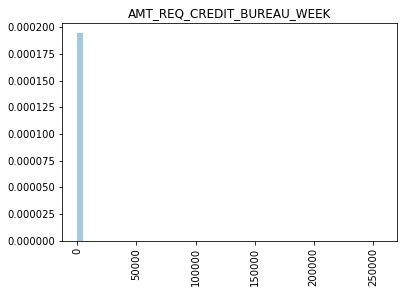

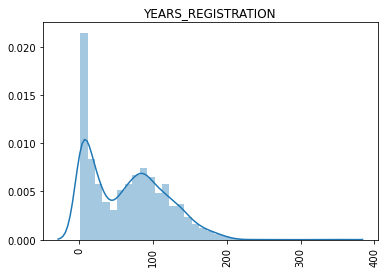

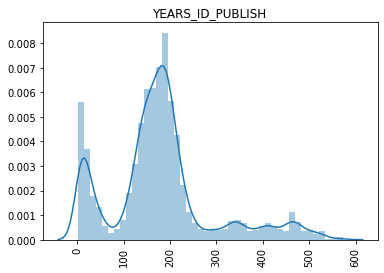

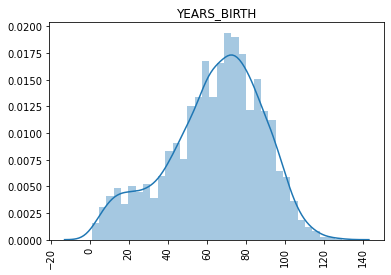

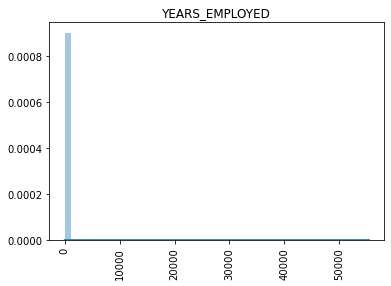

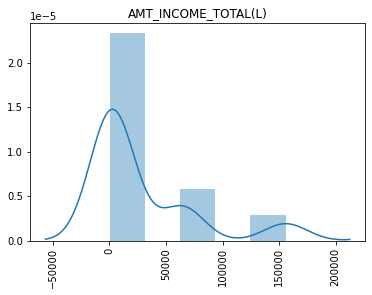

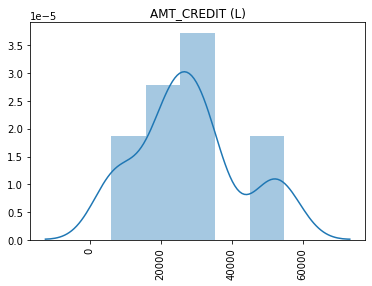

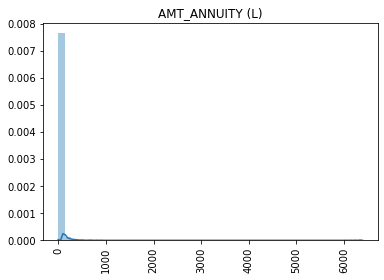

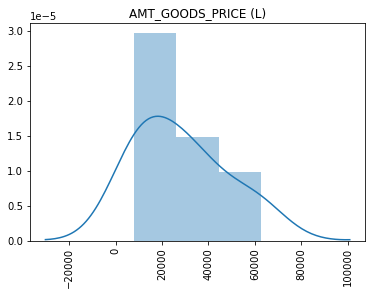

In [32]:
for col in numeric_app_data.columns:
    counts = numeric_app_data[col].value_counts()
    plt.title(col)
    sns.distplot(counts.to_list())
    plt.xticks(rotation = 90)
    plt.show()

# SEGMENTED UNIVARIATE ANALYSIS

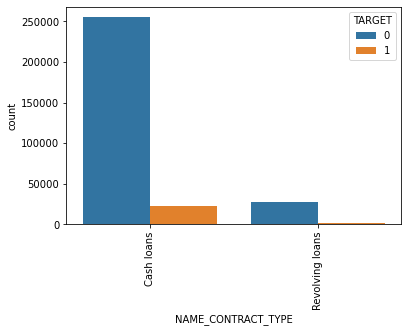

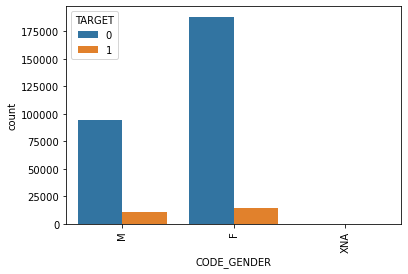

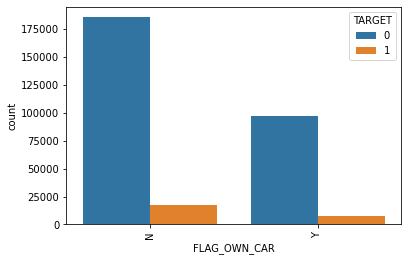

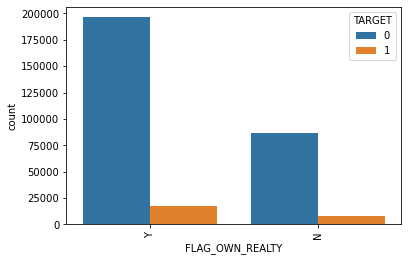

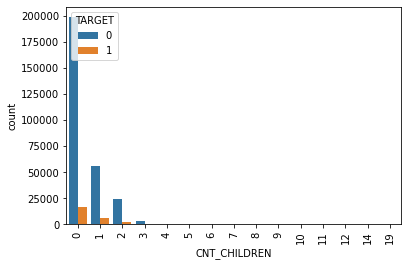

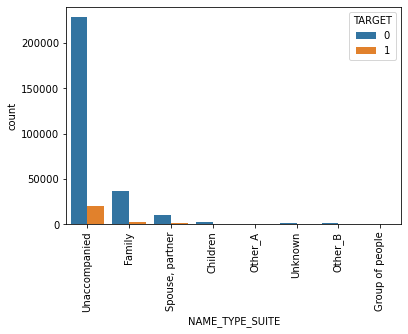

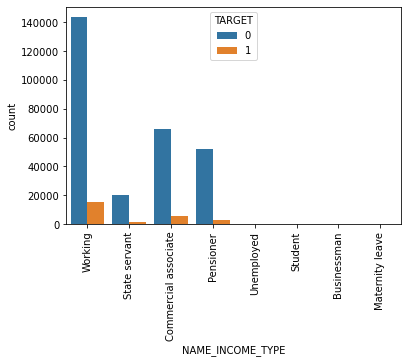

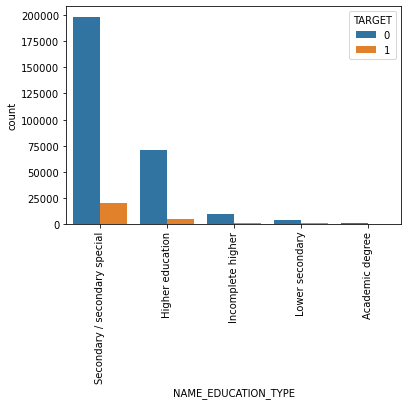

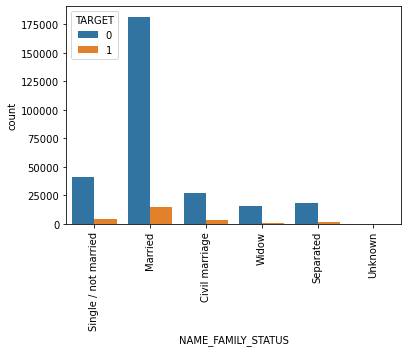

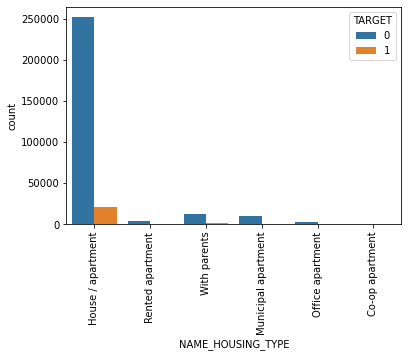

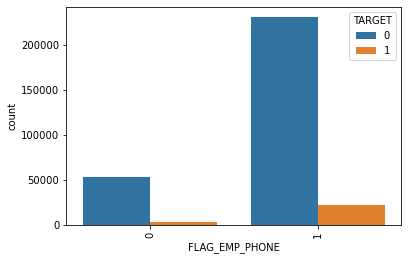

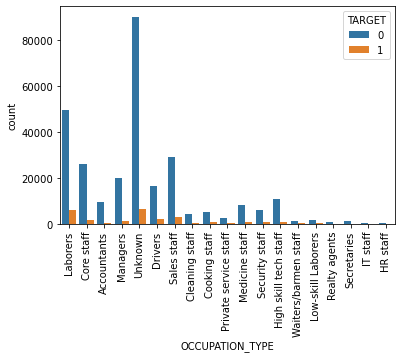

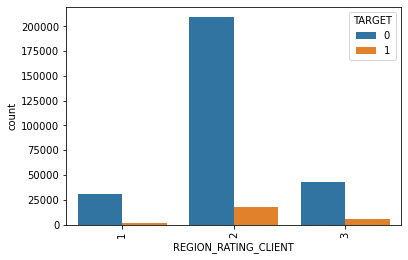

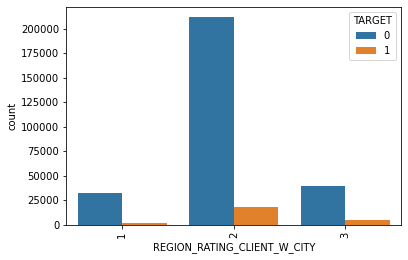

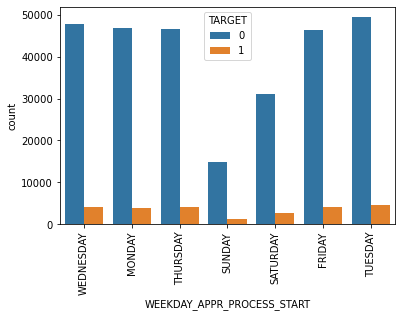

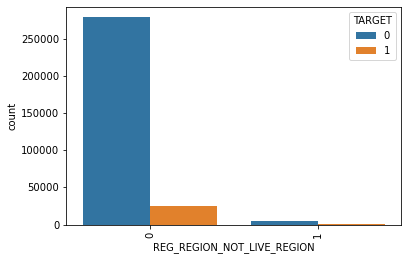

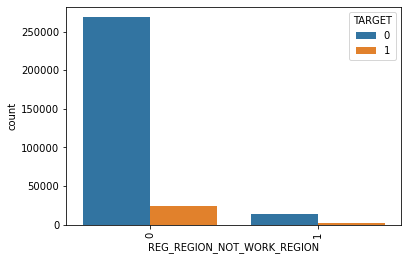

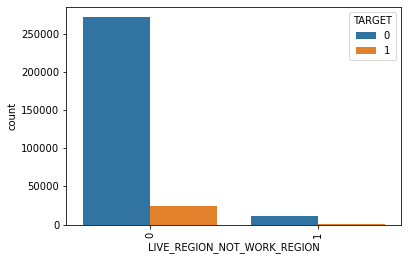

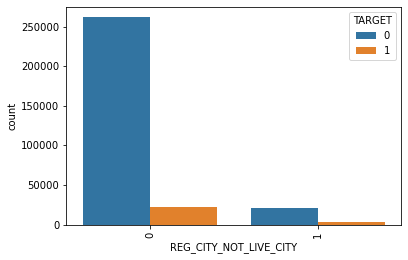

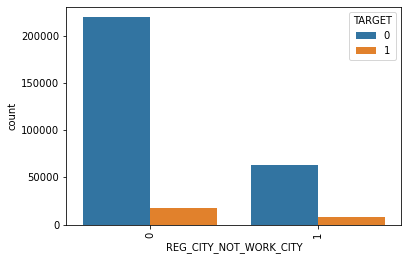

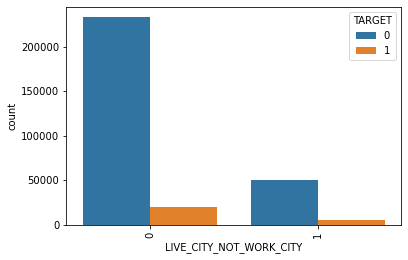

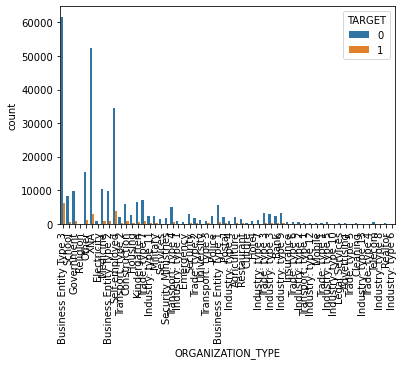

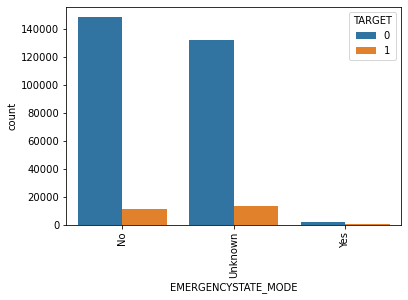

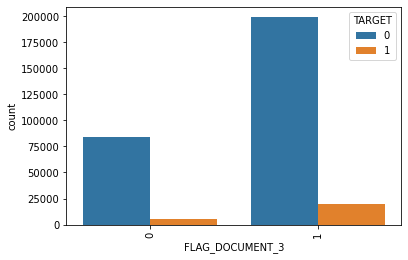

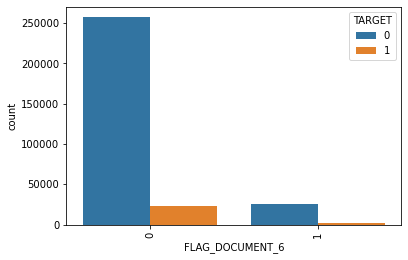

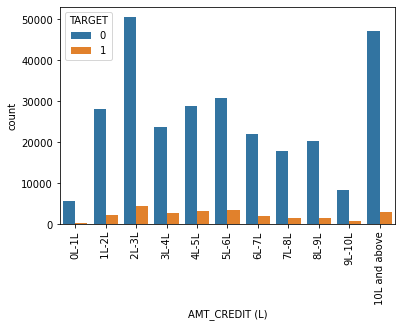

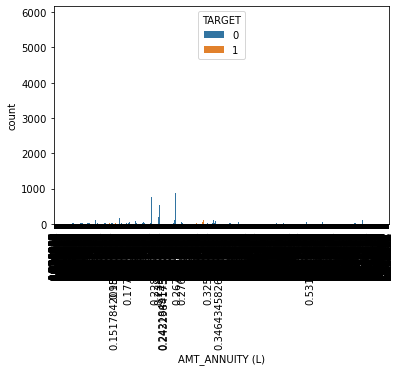

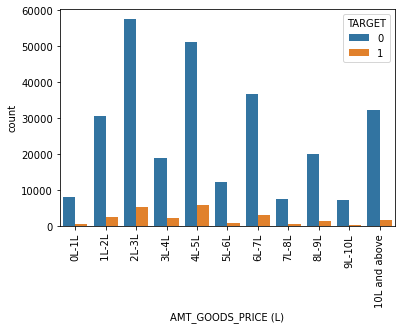

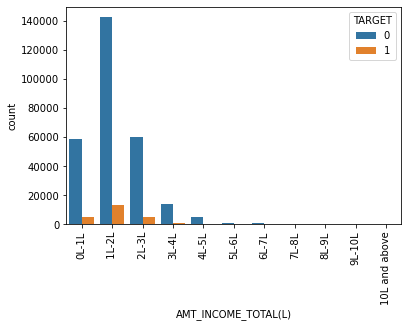

In [33]:
for col in categoric_app_data.columns:
    if col != 'TARGET':
        sns.countplot(x = col, data = categoric_app_data, hue = 'TARGET')
        plt.xticks(rotation = 90)
        plt.show()

In [34]:
categoric_app_data['TARGET'].value_counts().keys().to_list()[1]

1

In [35]:
new_app_data = categoric_app_data[categoric_app_data['TARGET'] == 1]

In [36]:
new_app_data.sample(2)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
110649       1         Cash loans           M            Y               N   
172513       1         Cash loans           M            N               Y   

        CNT_CHILDREN NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
110649             0   Unaccompanied  Commercial associate   
172513             0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
110649  Secondary / secondary special     Civil marriage   Rented apartment   
172513  Secondary / secondary special            Married  House / apartment   

        FLAG_EMP_PHONE OCCUPATION_TYPE  REGION_RATING_CLIENT  \
110649               1  Medicine staff                     3   
172513               1        Laborers                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
110649                            3                   THURSDAY   
172513                            2                     MONDAY   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
110649                           0                           0   
172513                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
110649                            0                       1   
172513                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
110649                       1                        1   
172513                       1                        1   

             ORGANIZATION_TYPE EMERGENCYSTATE_MODE  FLAG_DOCUMENT_3  \
110649  Business Entity Type 2             Unknown                0   
172513  Business Entity Type 3             Unknown                1   

        FLAG_DOCUMENT_6 AMT_CREDIT (L)  AMT_ANNUITY (L) AMT_GOODS_PRICE (L)  \
110649                0          3L-4L           0.2844               3L-4L   
172513                0          8L-9L           0.4032               6L-7L   

       AMT_INCOME_TOTAL(L)  
110649               1L-2L  
172513               2L-3L

In [37]:
new_app_data.shape

(24825, 30)

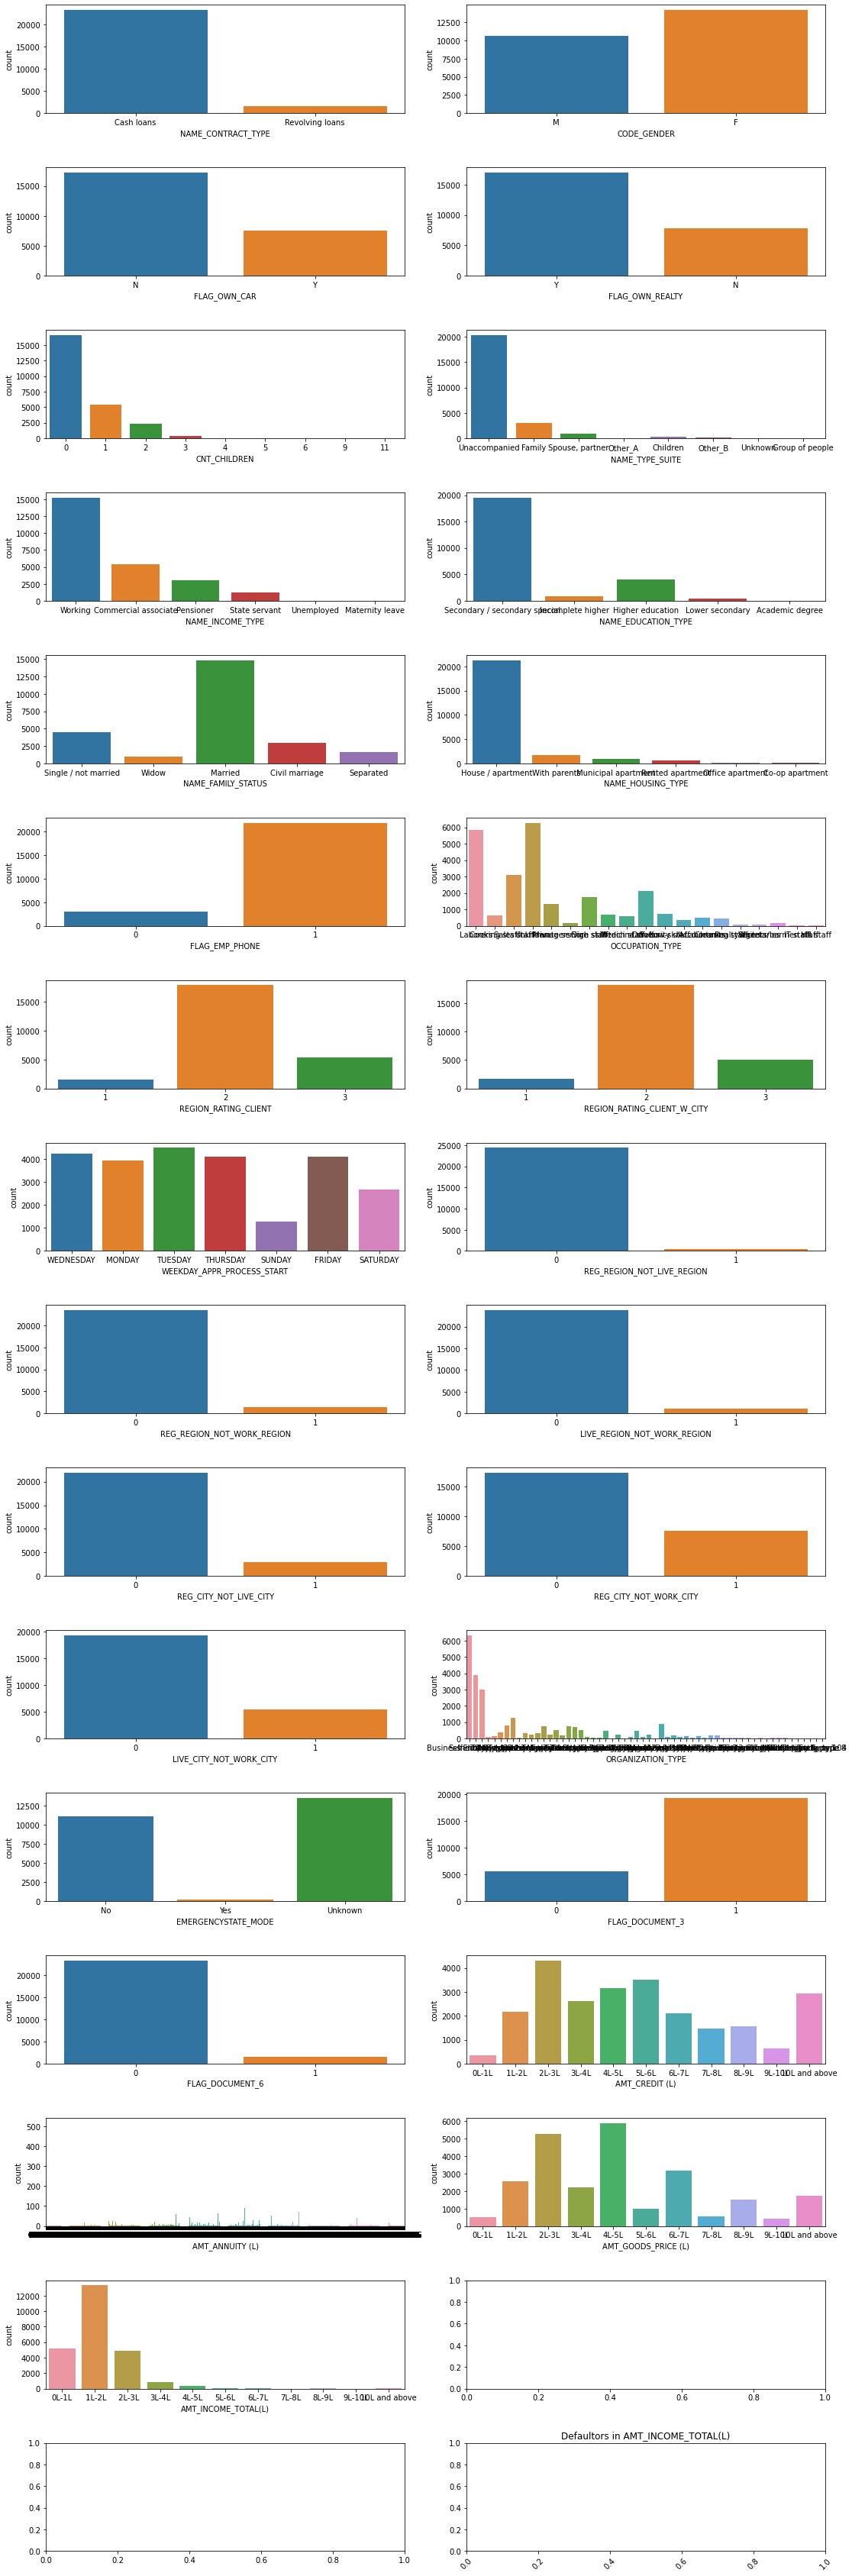

In [174]:
# Target 1 is Defaultor for Categorical data
figure, axs = plt.subplots(16,2, figsize = (16,48))
figure.tight_layout(pad=5.0)
row_num, col_num = 0, 0
for col in categoric_app_data.columns:
    if col != 'TARGET':
        sns.countplot(x = col, data = new_app_data, ax = axs[row_num, col_num])
        plt.title("Defaultors in "+col)
        plt.xticks(rotation = 45)
        col_num += 1
        if col_num%2 == 0:
            col_num = 0
            row_num += 1
        if row_num == 16:
            break

In [43]:
numeric_app_data.drop(['AMT_CREDIT (L)','AMT_ANNUITY (L)','AMT_GOODS_PRICE (L)','AMT_INCOME_TOTAL(L)'], inplace = True, axis = 1)

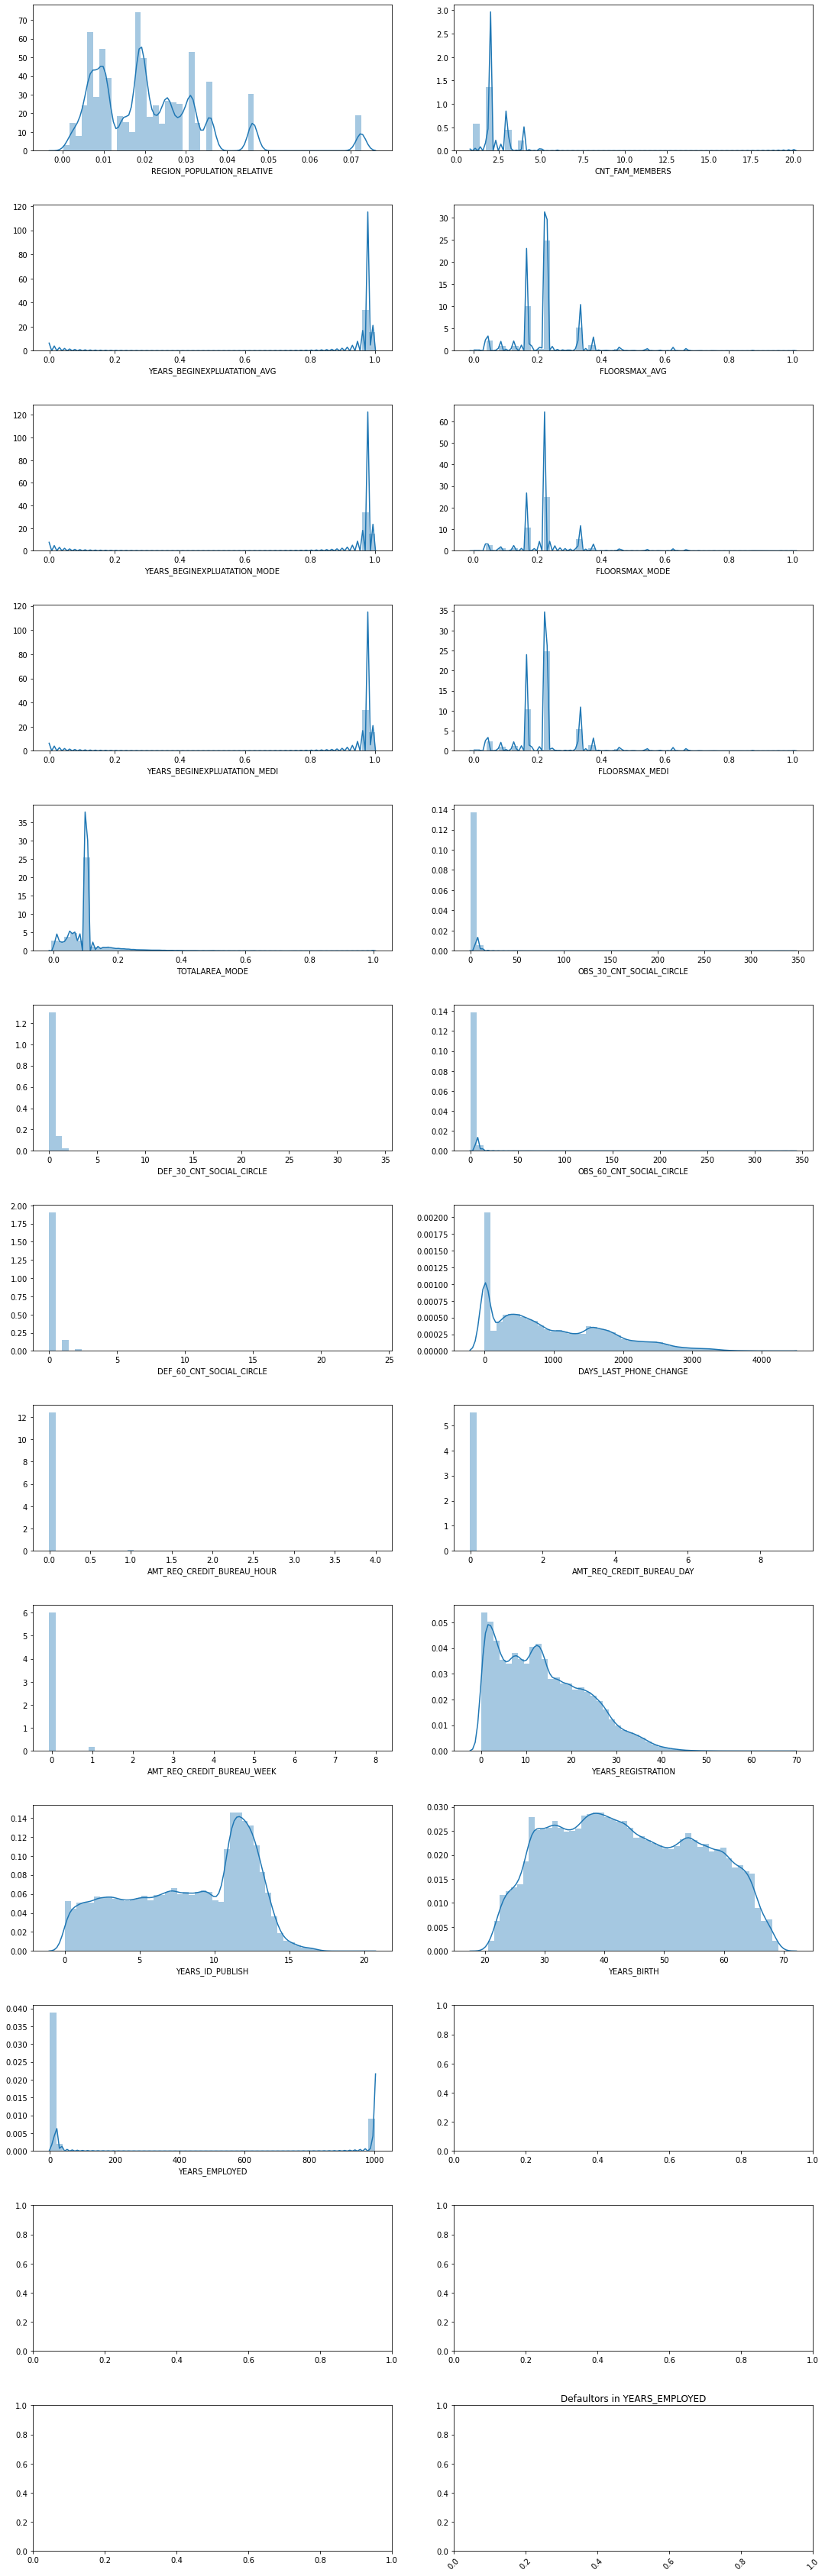

In [147]:
# Target 1 is Defaultor for Numeric DataDD
figure, axs = plt.subplots(13,2, figsize = (16,48))
figure.tight_layout(pad=5.0)
row_num, col_num = 0, 0
for col in numeric_app_data.columns:
    if col != 'TARGET':
        sns.distplot(numeric_app_data[col], ax = axs[row_num, col_num])
        plt.title("Defaultors in "+col)
        plt.xticks(rotation = 45)
        col_num += 1
        if col_num%2 == 0:
            col_num = 0
            row_num += 1
        if row_num == 13:
            break

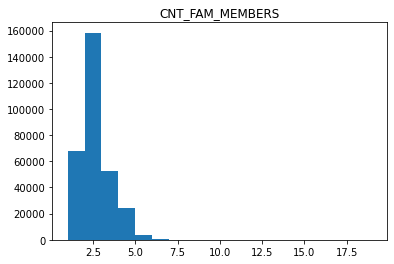

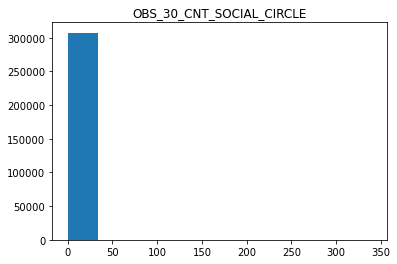

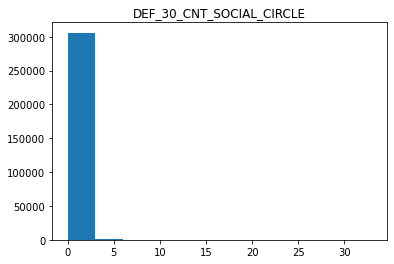

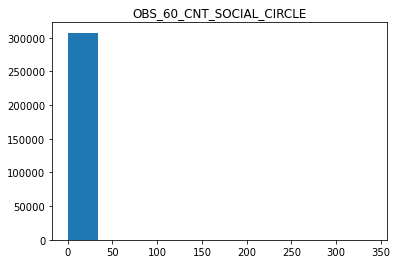

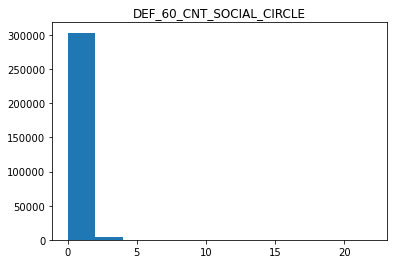

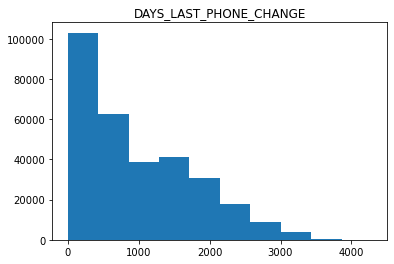

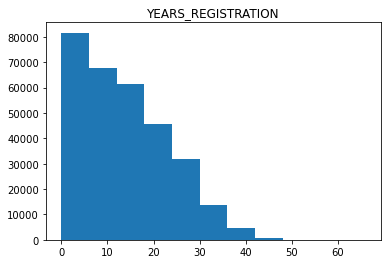

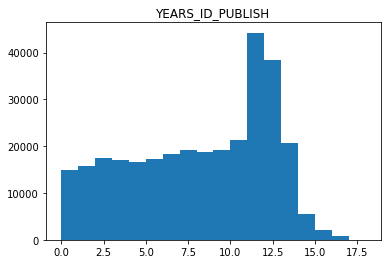

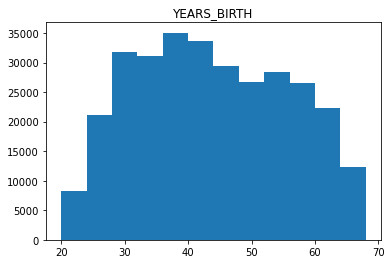

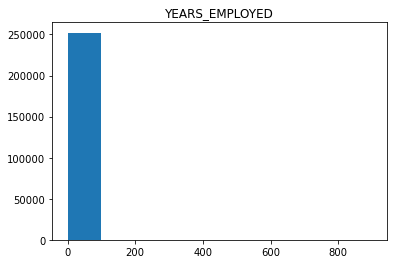

In [44]:
# Segmented Univariate Analysis of Numeric data
for col in numeric_app_data.columns:
    minimum = int(numeric_app_data[col].min())
    maximum = int(numeric_app_data[col].max())
    d = int((maximum - minimum)/10)
    if d!=0:
        plt.title(col)
        plt.hist(numeric_app_data[col], bins = range(minimum, maximum, d))
        plt.show()

In [45]:
numeric_app_data['TARGET'] = app_data['TARGET']

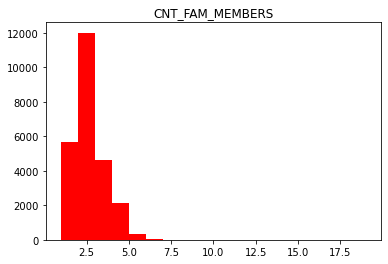

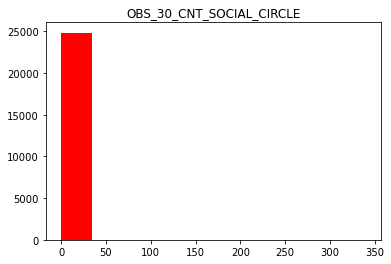

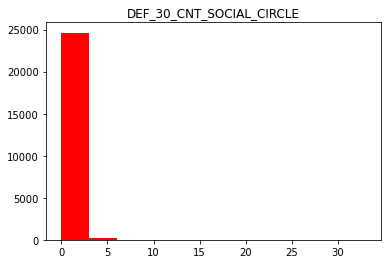

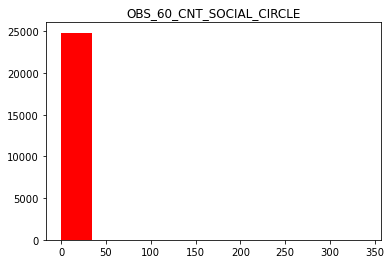

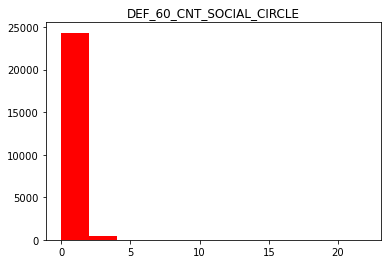

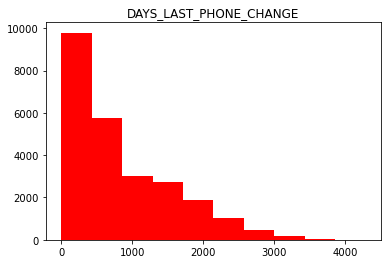

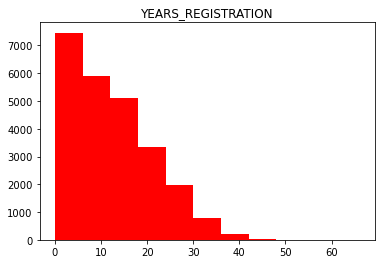

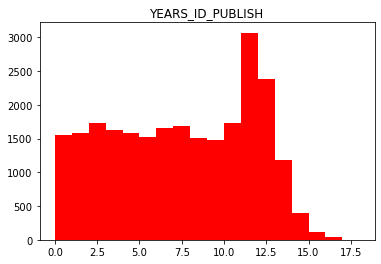

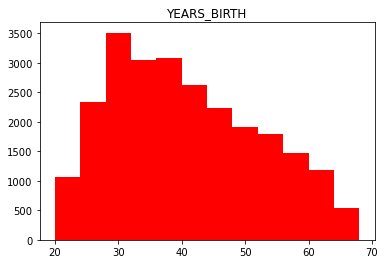

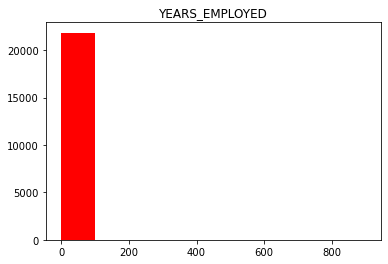

In [46]:
# Segmented Univariate Analysis of Numeric data
# figure, ax = plt.subplots(1,2)
for col in numeric_app_data.columns:
    minimum = int(numeric_app_data[col].min())
    maximum = int(numeric_app_data[col].max())
    d = int((maximum - minimum)/10)
    if d!=0:
        plt.title(col)
        plt.hist(numeric_app_data[col][numeric_app_data['TARGET']==1], bins = range(minimum, maximum, d),color = 'r')
        plt.show()

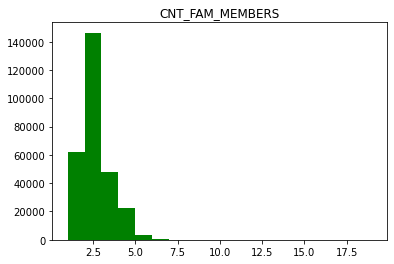

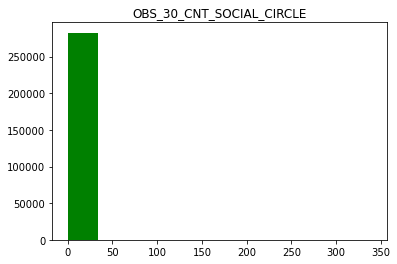

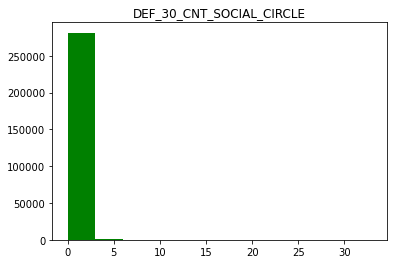

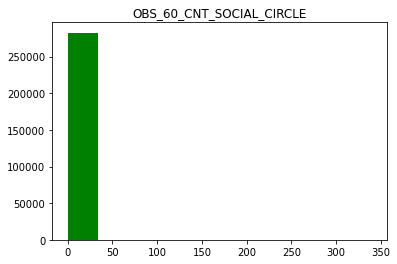

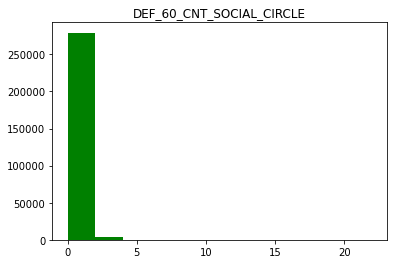

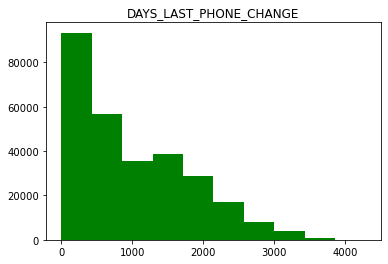

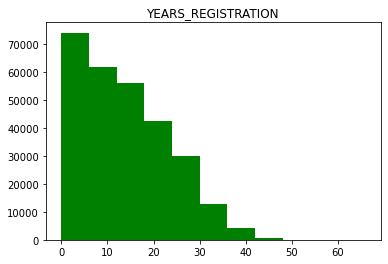

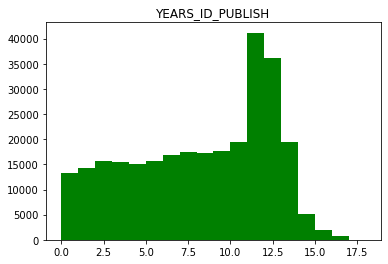

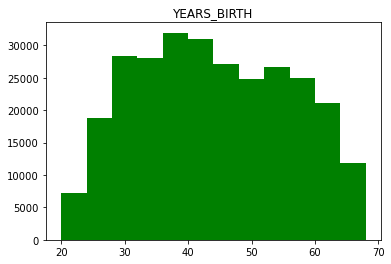

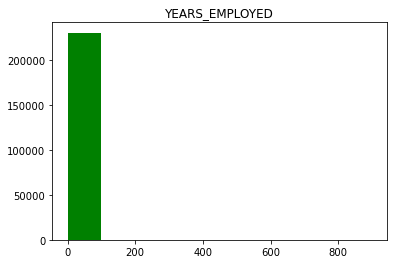

In [48]:
for col in numeric_app_data.columns:
    minimum = int(numeric_app_data[col].min())
    maximum = int(numeric_app_data[col].max())
    d = int((maximum - minimum)/10)
    if d!=0:
        plt.title(col)
        plt.hist(numeric_app_data[col][numeric_app_data['TARGET']==0], bins = range(minimum, maximum, d),color = 'g')
        plt.show()

# BIVARIATE ANALYSIS

In [ ]:
# Bivariate Analysis can be done in two ways - scatter plot and by correlation coeffiecient

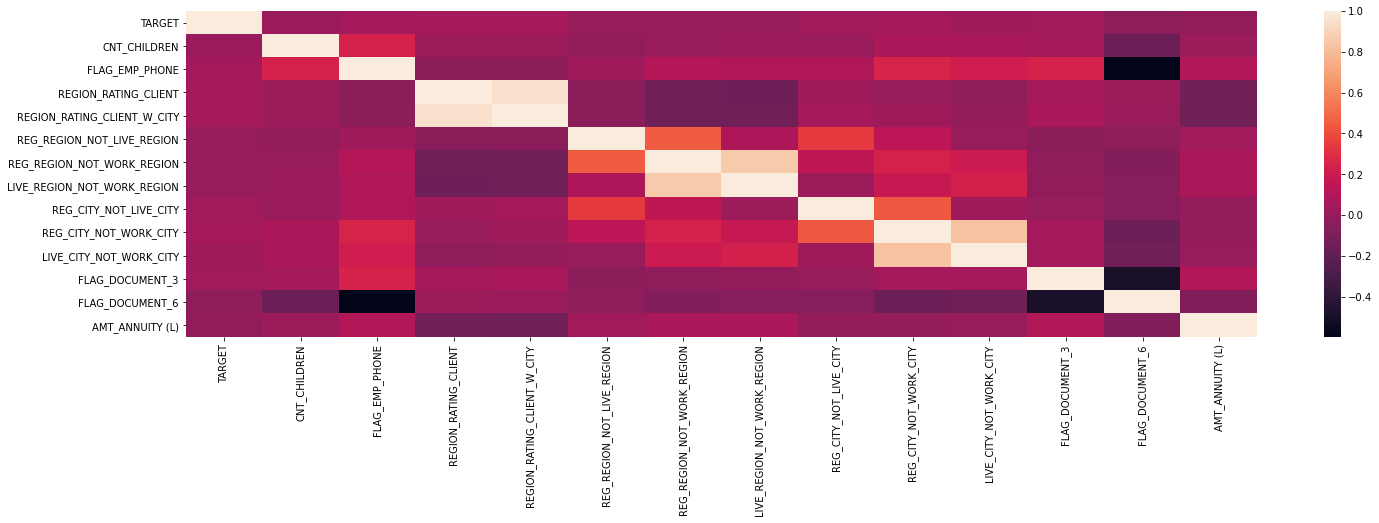

In [49]:
plt.figure(figsize = (24, 6))
sns.heatmap(categoric_app_data.corr())

In [55]:
num_app_data = app_data.select_dtypes(include = ['float', 'int'])
num_app_data['TARGET'] = app_data['TARGET']
num_app_data.sample(2)

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
51459          441000.0   1183396.5      79533.0        1134000.0   
90283           94500.0    700830.0      20619.0         585000.0   

       REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
51459                    0.018634              1.0   
90283                    0.024610              1.0   

       YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
51459                     0.977693        0.22785   
90283                     0.989100        0.33330   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
51459                      0.977272        0.222185   
90283                      0.989100        0.333300   

       YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
51459                       0.97773        0.226887        0.106081   
90283                       0.98910        0.333300        0.091900   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
51459                       0.0                       0.0   
90283                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
51459                       0.0                       0.0   
90283                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
51459                     2.0                         0.0   
90283                  2100.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
51459                        0.0                         0.0   
90283                        0.0                         0.0   

       YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_BIRTH  YEARS_EMPLOYED  \
51459               23.70             11.41        43.81            2.69   
90283                3.97             12.16        58.57         1000.67   

       TARGET  
51459       0  
90283       0

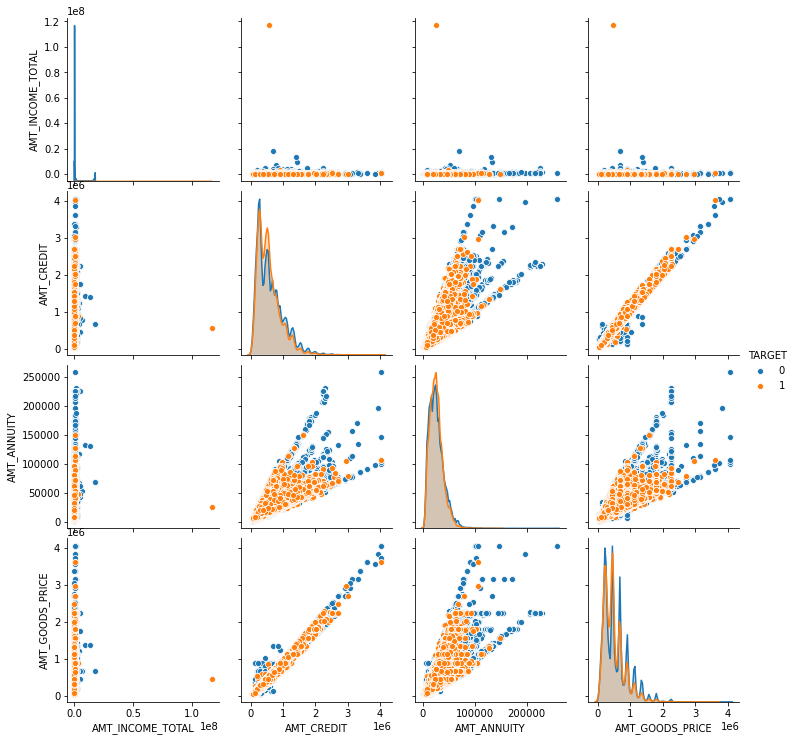

In [56]:
ndf = num_app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]
sns.pairplot(ndf, hue = 'TARGET')

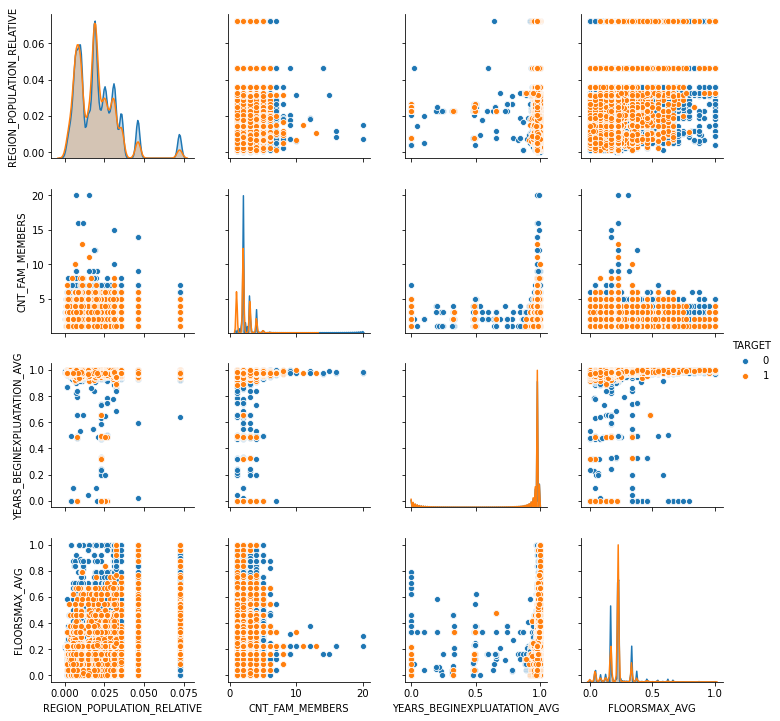

In [57]:
ndf = num_app_data[['REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','TARGET']]
sns.pairplot(ndf, hue = 'TARGET')

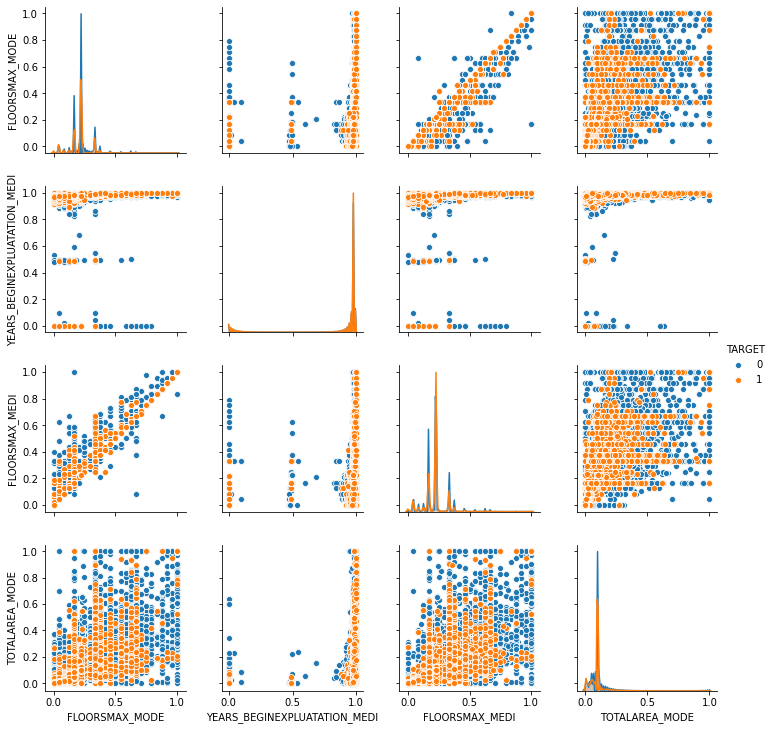

In [58]:
ndf = num_app_data[['FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','TARGET']]
sns.pairplot(ndf, hue = 'TARGET')

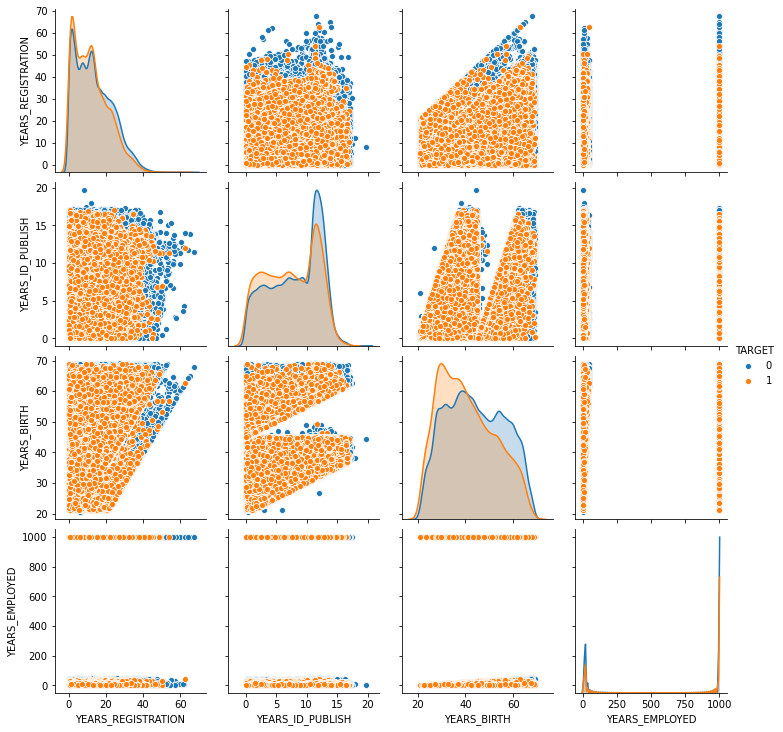

In [59]:
ndf = num_app_data[['YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_BIRTH','YEARS_EMPLOYED','TARGET']]
sns.pairplot(ndf, hue = 'TARGET')

In [92]:
mixed_data = pd.concat([categoric_app_data, num_app_data], axis = 1, join='inner')

In [93]:
mixed_data.drop('TARGET', axis = 1, inplace = True)

In [94]:
mixed_data['TARGET'] = app_data['TARGET']

In [95]:
mixed_data.drop(['AMT_CREDIT (L)','AMT_ANNUITY (L)','AMT_GOODS_PRICE (L)','AMT_INCOME_TOTAL(L)'],axis = 1, inplace=True)

In [96]:
mixed_data.sample(2)

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
276514         Cash loans           F            N               Y   
9085           Cash loans           F            N               Y   

        CNT_CHILDREN NAME_TYPE_SUITE NAME_INCOME_TYPE  \
276514             2   Unaccompanied          Working   
9085               0   Unaccompanied          Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
276514  Secondary / secondary special        Civil marriage   
9085    Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  FLAG_EMP_PHONE OCCUPATION_TYPE  \
276514  House / apartment               1     Sales staff   
9085    House / apartment               1      Core staff   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
276514                     3                            3   
9085                       1                            1   

       WEEKDAY_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
276514                   SATURDAY                           0   
9085                     THURSDAY                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
276514                           0                            0   
9085                             0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
276514                       0                       1   
9085                         0                       0   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE EMERGENCYSTATE_MODE  \
276514                        1        Government                  No   
9085                          0        Government                  No   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  AMT_INCOME_TOTAL  AMT_CREDIT  \
276514                1                0          130500.0    808650.0   
9085                  1                0          202500.0    760225.5   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
276514      31464.0         675000.0                     0.01050   
9085        32337.0         679500.0                     0.04622   

        CNT_FAM_MEMBERS  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
276514              4.0                       0.9846         0.0833   
9085                1.0                       0.9806         0.3333   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
276514                        0.9846          0.0833   
9085                          0.9806          0.3333   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
276514                        0.9846          0.0833          0.0177   
9085                          0.9806          0.3333          0.1383   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
276514                       0.0                       0.0   
9085                         0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
276514                       0.0                       0.0   
9085                         0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
276514                   607.0                         0.0   
9085                     267.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
276514                        0.0                         0.0   
9085                          0.0                         0.0   

        YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_BIRTH  YEARS_EMPLOYED  \
276514                1.58             11.05        37.03            2.57   
9085                 14.72             12.15        60.11           39.62   

        TARGET  
276514       1  
9085         0

In [161]:
# Top 10 Correlations for Defaulter
defaulter_mixed_data = mixed_data[mixed_data['TARGET'] == 1]
defaulter_corr_matrix = defaulter_mixed_data.corr()

final_corr = defaulter_corr_matrix.unstack().sort_values().abs().dropna()
final_corr

YEARS_EMPLOYED                FLAG_EMP_PHONE                  0.999705
FLAG_EMP_PHONE                YEARS_EMPLOYED                  0.999705
                              FLAG_DOCUMENT_6                 0.617421
FLAG_DOCUMENT_6               FLAG_EMP_PHONE                  0.617421
FLAG_EMP_PHONE                YEARS_BIRTH                     0.578521
YEARS_BIRTH                   FLAG_EMP_PHONE                  0.578521
FLAG_DOCUMENT_3               FLAG_DOCUMENT_6                 0.475807
FLAG_DOCUMENT_6               FLAG_DOCUMENT_3                 0.475807
REGION_POPULATION_RELATIVE    REGION_RATING_CLIENT_W_CITY     0.446977
REGION_RATING_CLIENT_W_CITY   REGION_POPULATION_RELATIVE      0.446977
REGION_RATING_CLIENT          REGION_POPULATION_RELATIVE      0.443236
REGION_POPULATION_RELATIVE    REGION_RATING_CLIENT            0.443236
FLAG_DOCUMENT_3               YEARS_EMPLOYED                  0.272169
YEARS_EMPLOYED                FLAG_DOCUMENT_3                 0.272169
CNT_CH

In [170]:
# Top 10 Correlations for Defaulter
defaulter_mixed_data = mixed_data[mixed_data['TARGET'] == 1]
dmd = defaulter_mixed_data.corr().unstack().abs().sort_values().dropna()
dmd

REG_CITY_NOT_LIVE_CITY        LIVE_REGION_NOT_WORK_REGION     0.000011
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
AMT_ANNUITY                   AMT_REQ_CREDIT_BUREAU_DAY       0.000038
AMT_REQ_CREDIT_BUREAU_DAY     AMT_ANNUITY                     0.000038
YEARS_BEGINEXPLUATATION_MEDI  AMT_ANNUITY                     0.000065
AMT_ANNUITY                   YEARS_BEGINEXPLUATATION_MEDI    0.000065
AMT_REQ_CREDIT_BUREAU_WEEK    AMT_INCOME_TOTAL                0.000132
AMT_INCOME_TOTAL              AMT_REQ_CREDIT_BUREAU_WEEK      0.000132
YEARS_REGISTRATION            AMT_INCOME_TOTAL                0.000155
AMT_INCOME_TOTAL              YEARS_REGISTRATION              0.000155
YEARS_BEGINEXPLUATATION_AVG   DAYS_LAST_PHONE_CHANGE          0.000158
DAYS_LAST_PHONE_CHANGE        YEARS_BEGINEXPLUATATION_AVG     0.000158
OBS_30_CNT_SOCIAL_CIRCLE      FLAG_DOCUMENT_6                 0.000175
FLAG_DOCUMENT_6               OBS_30_CNT_SOCIAL_CIRCLE        0.000175
AMT_AN

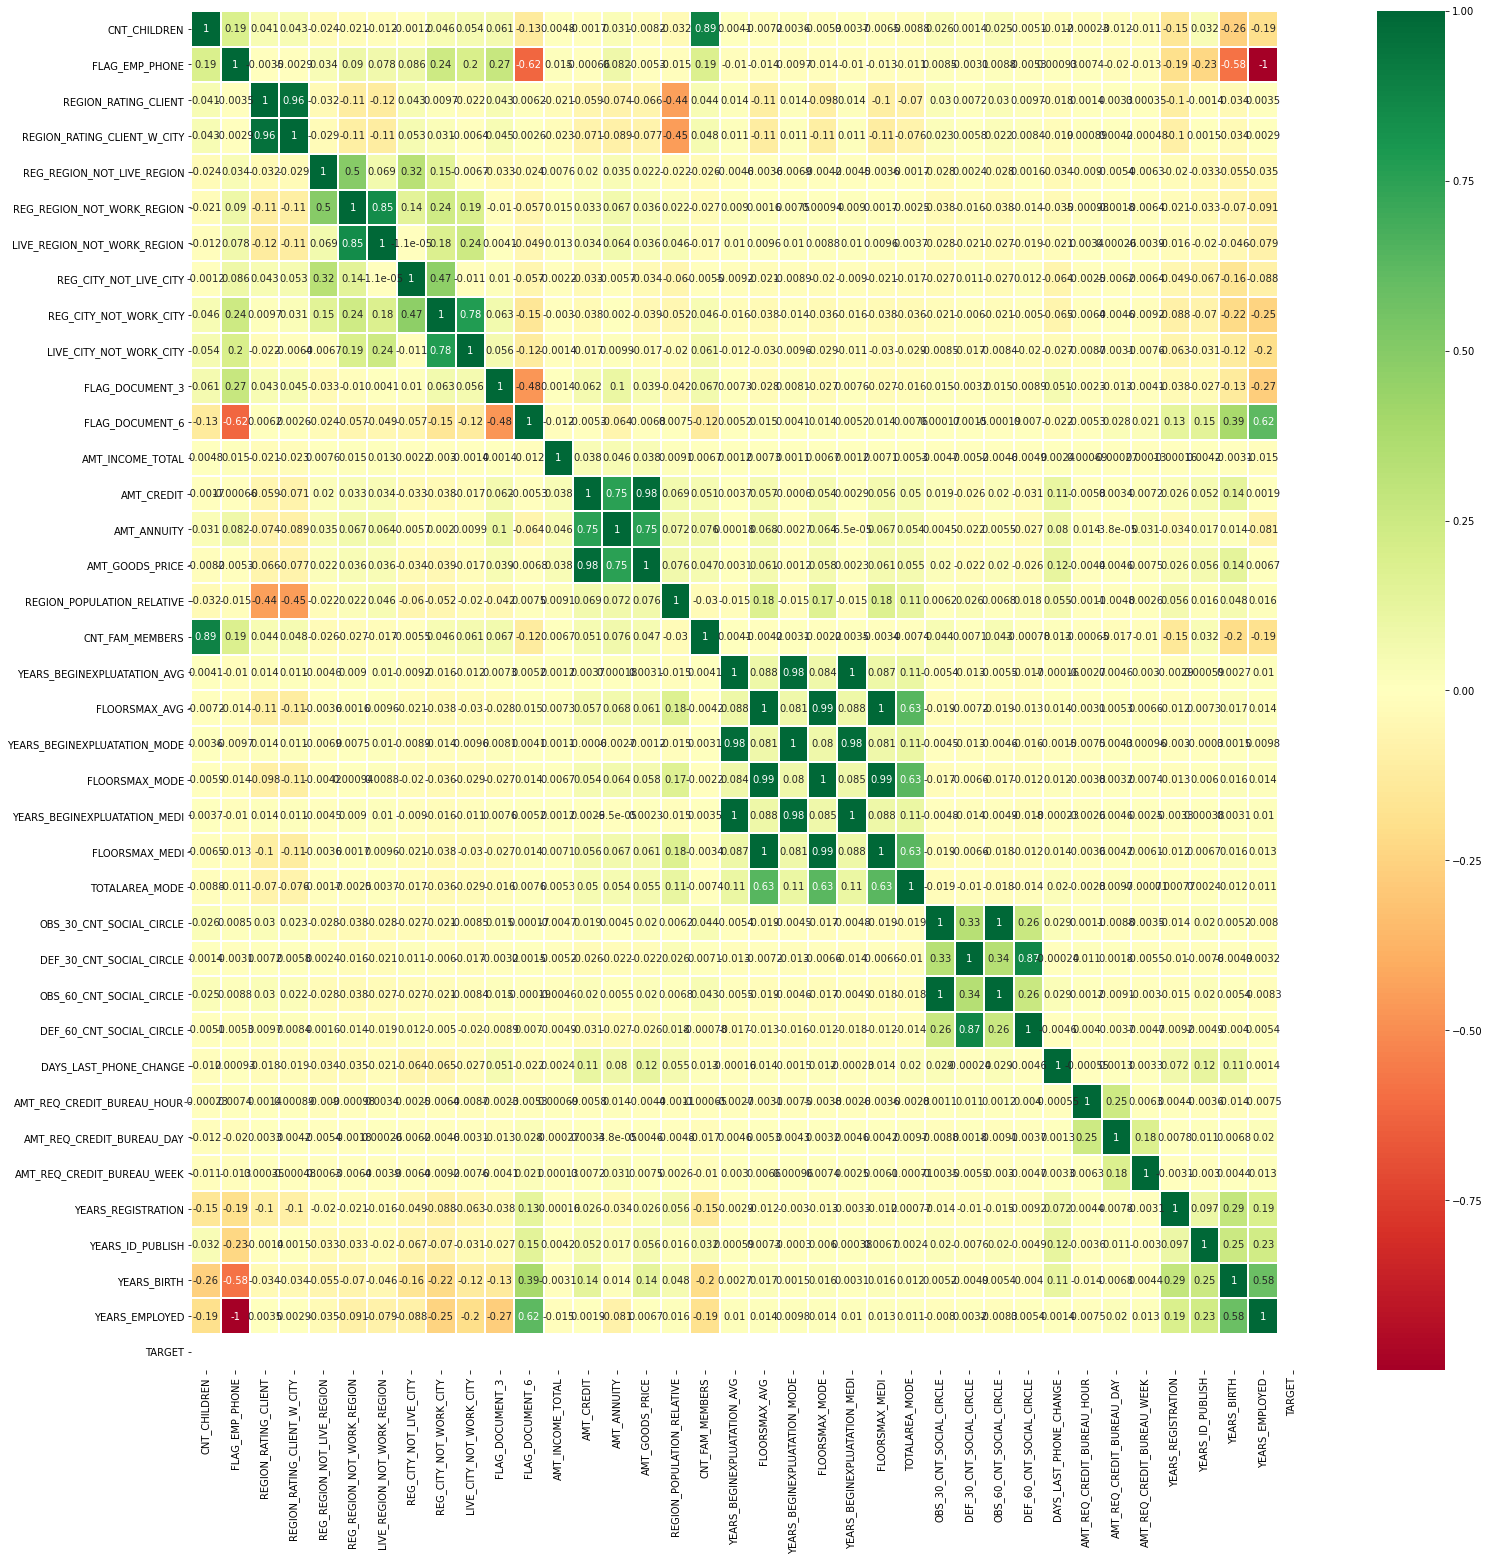

In [158]:
#plotting heatmap to see linear correlation amoung Defaulters

fig = plt.figure(figsize=(25,25))
ax = sns.heatmap(defaulter_mixed_data.corr(), cmap="RdYlGn",annot=True,linewidth =1)

In [171]:
#Correlations for Creditor

creditor_mixed_data = mixed_data[mixed_data['TARGET'] == 0]
cmd = creditor_mixed_data.corr().unstack().abs().sort_values().dropna()

cmd

CNT_FAM_MEMBERS               AMT_REQ_CREDIT_BUREAU_DAY       0.000006
AMT_REQ_CREDIT_BUREAU_DAY     CNT_FAM_MEMBERS                 0.000006
FLOORSMAX_MODE                AMT_REQ_CREDIT_BUREAU_WEEK      0.000008
AMT_REQ_CREDIT_BUREAU_WEEK    FLOORSMAX_MODE                  0.000008
YEARS_BEGINEXPLUATATION_AVG   OBS_60_CNT_SOCIAL_CIRCLE        0.000018
OBS_60_CNT_SOCIAL_CIRCLE      YEARS_BEGINEXPLUATATION_AVG     0.000018
YEARS_BEGINEXPLUATATION_AVG   OBS_30_CNT_SOCIAL_CIRCLE        0.000025
OBS_30_CNT_SOCIAL_CIRCLE      YEARS_BEGINEXPLUATATION_AVG     0.000025
AMT_REQ_CREDIT_BUREAU_DAY     YEARS_REGISTRATION              0.000078
YEARS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY       0.000078
AMT_REQ_CREDIT_BUREAU_WEEK    REG_REGION_NOT_WORK_REGION      0.000093
REG_REGION_NOT_WORK_REGION    AMT_REQ_CREDIT_BUREAU_WEEK      0.000093
AMT_REQ_CREDIT_BUREAU_HOUR    LIVE_CITY_NOT_WORK_CITY         0.000112
LIVE_CITY_NOT_WORK_CITY       AMT_REQ_CREDIT_BUREAU_HOUR      0.000112
YEARS_

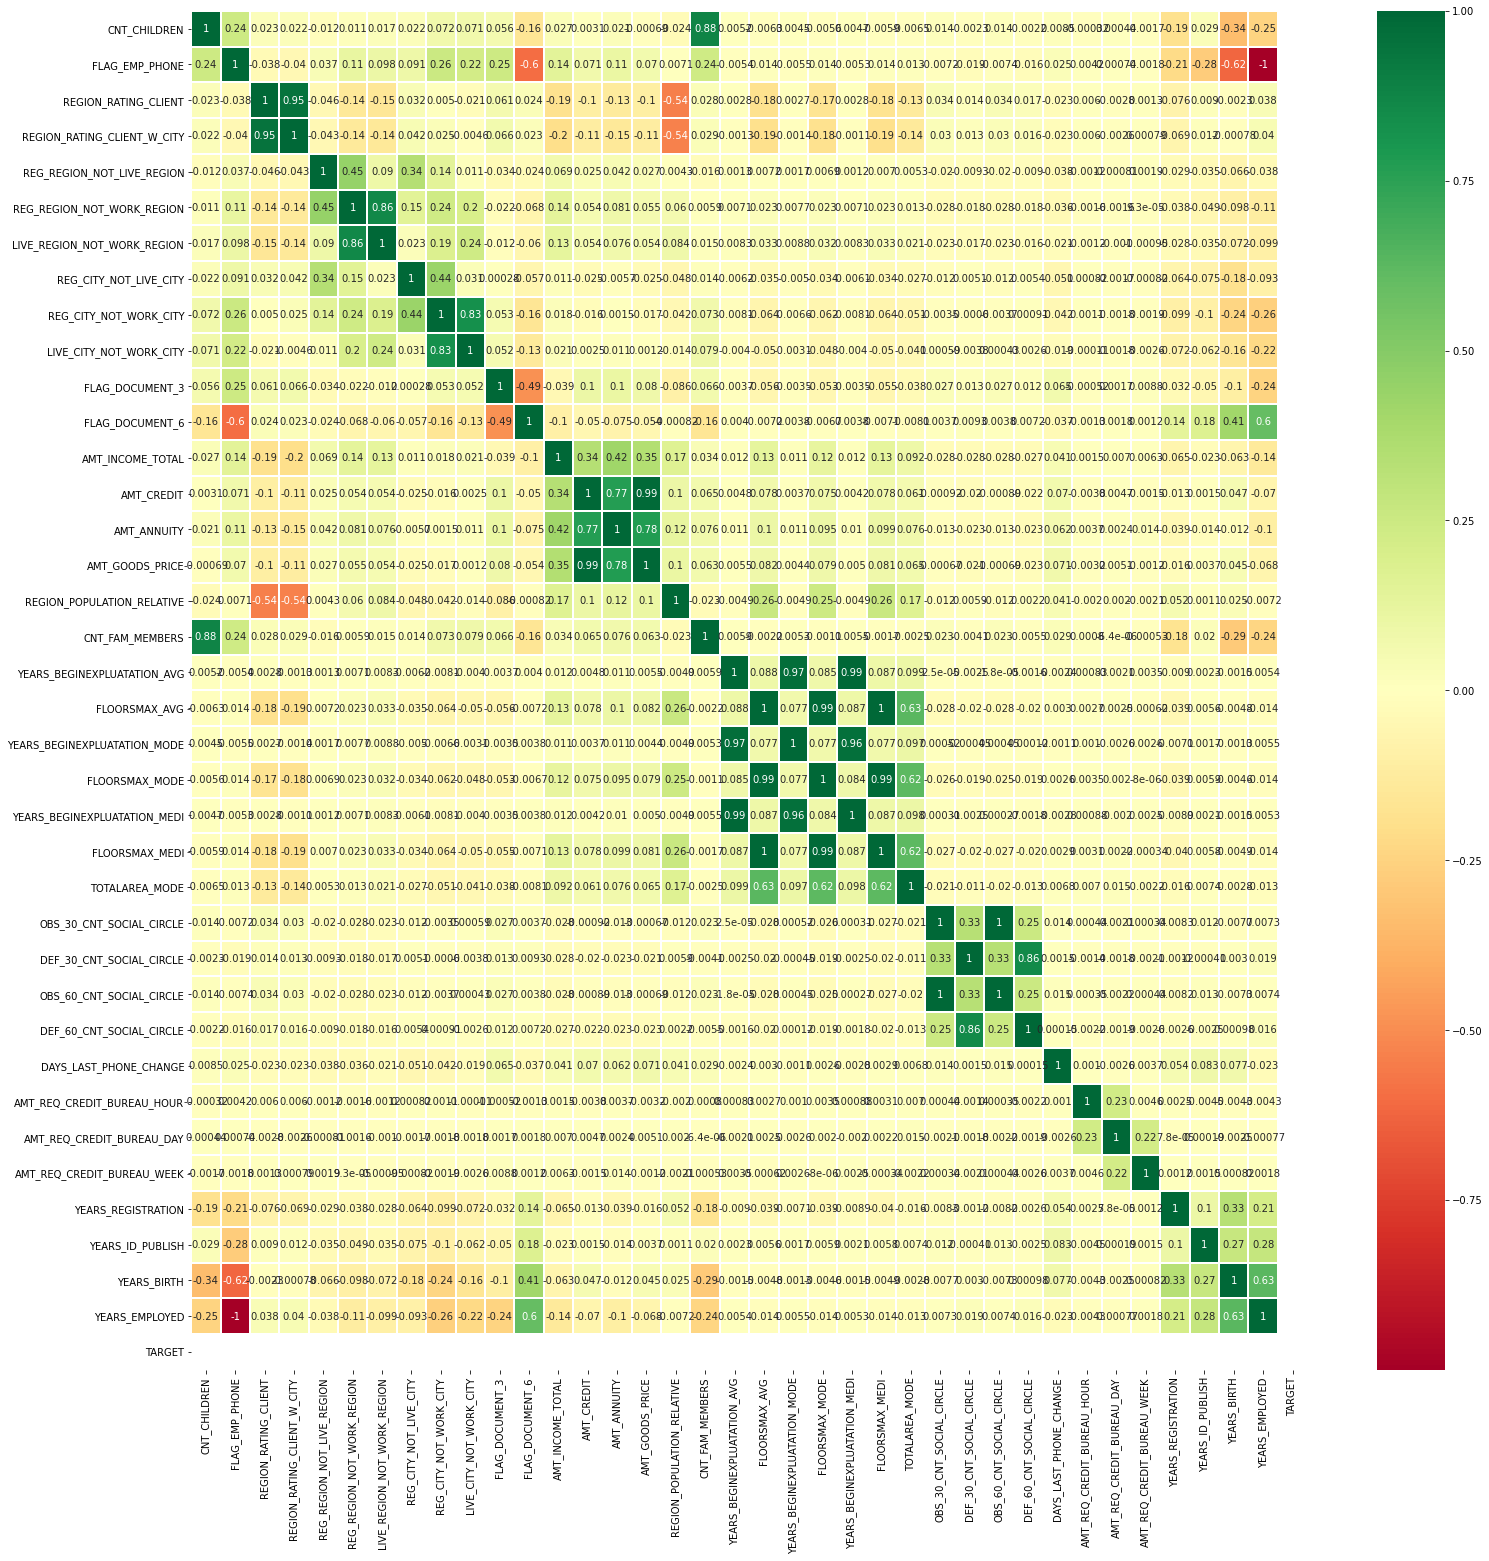

In [172]:
#plotting heatmap to see linear correlation amoung Creditors
fig = plt.figure(figsize=(25,25))
ax = sns.heatmap(creditor_mixed_data.corr(), cmap="RdYlGn",annot=True,linewidth =1)

# DATA IMBALANCE

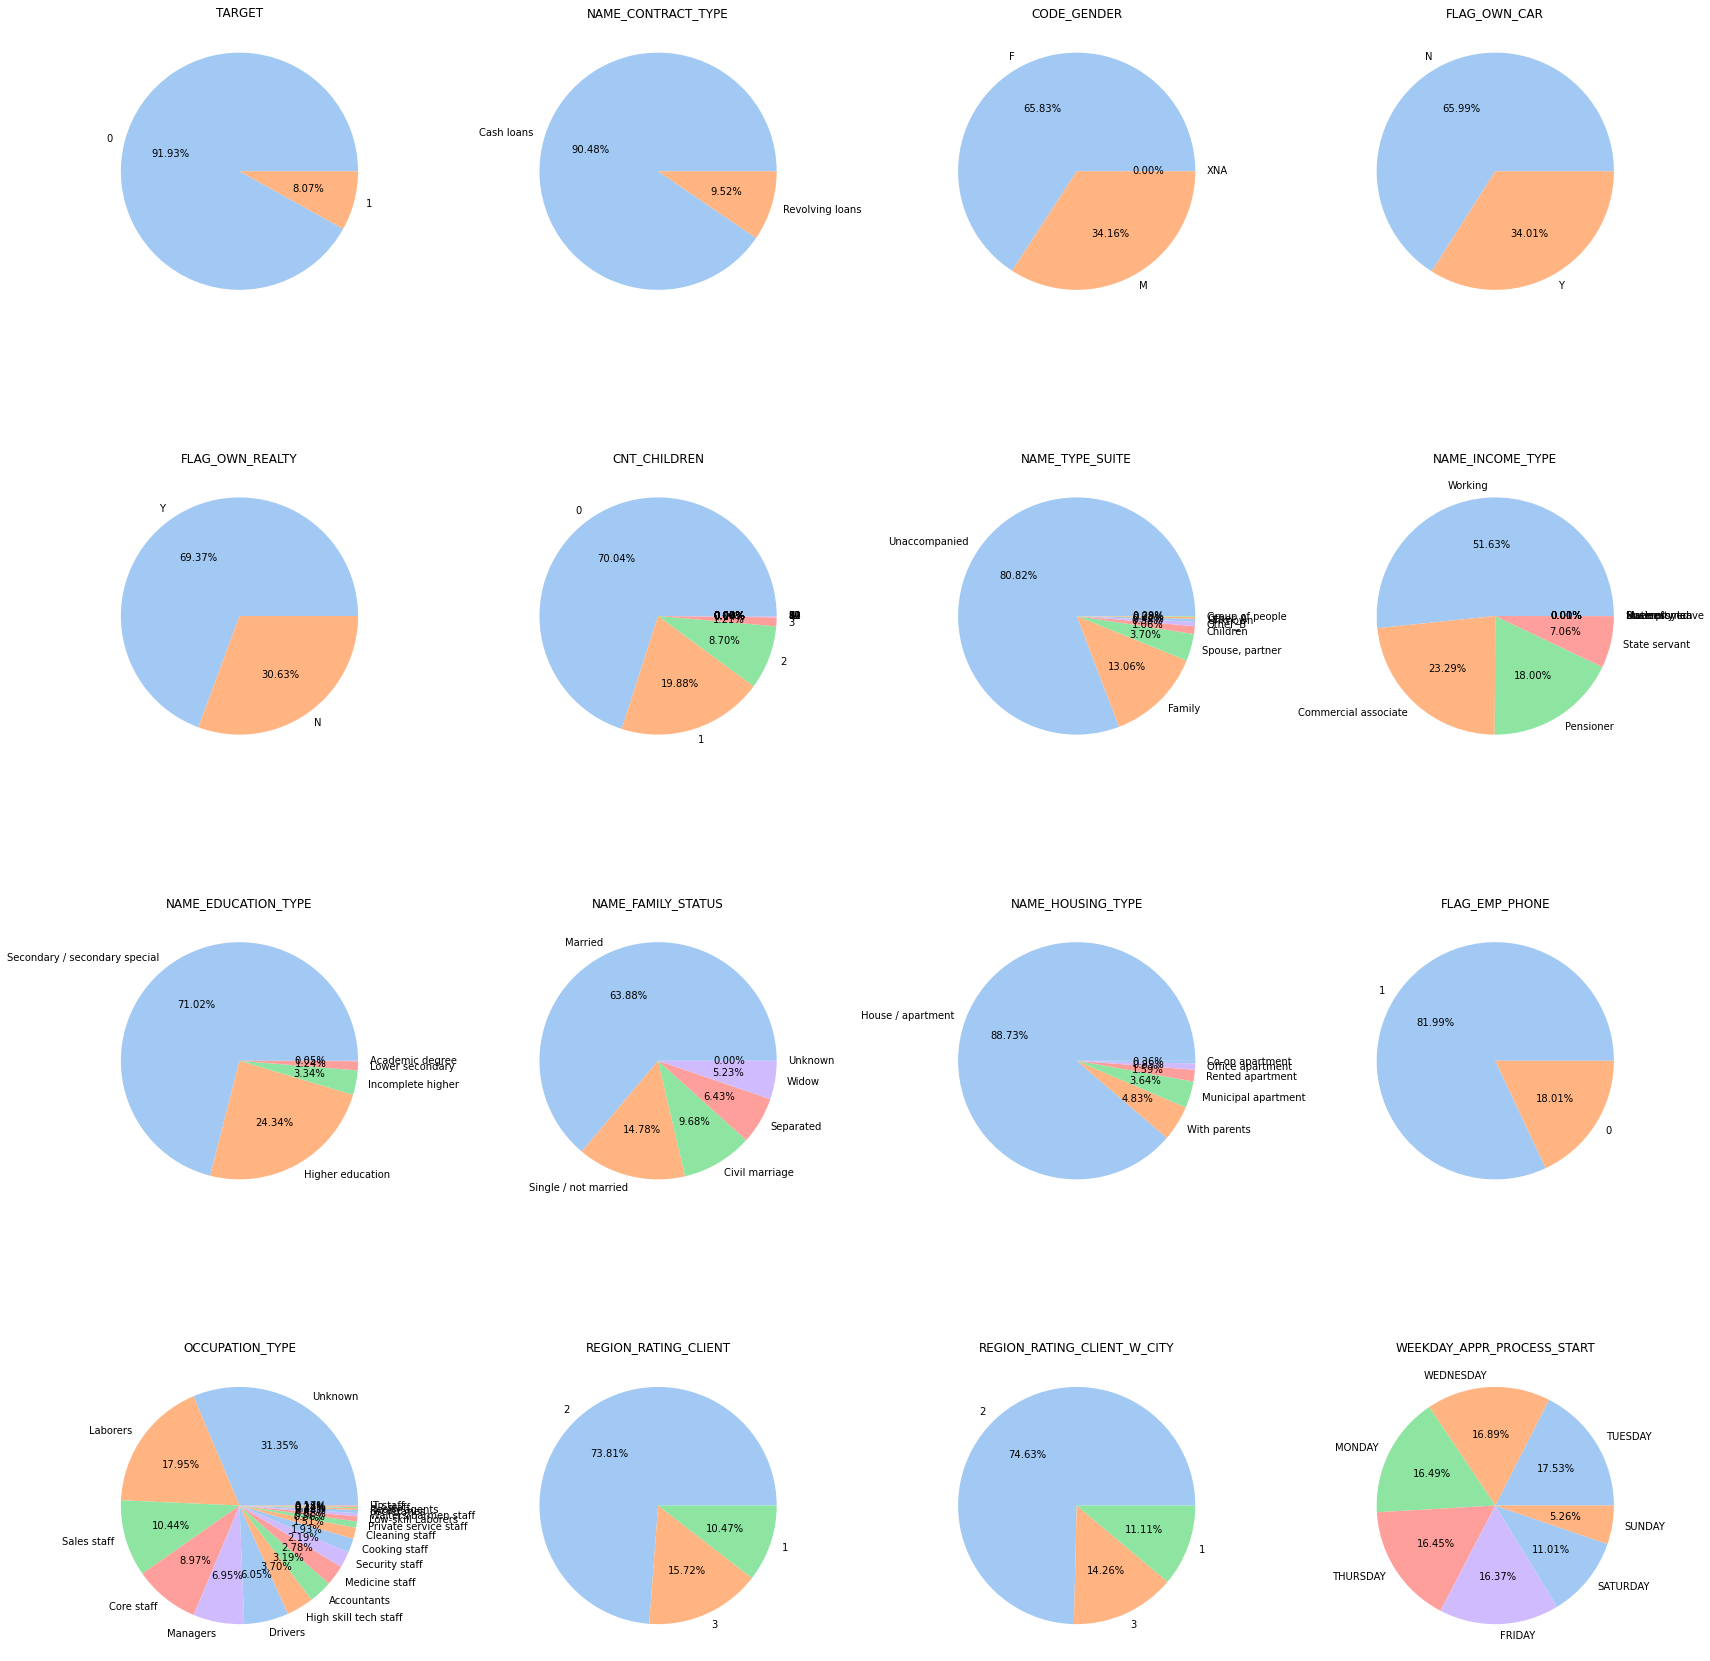

In [141]:
figure, ax = plt.subplots(4,4,figsize=(30,30), facecolor='w', edgecolor='k')
figure.subplots_adjust(hspace = 0.5, wspace=0.001)
row_num = 0
col_num = 0
colors = sns.color_palette('pastel')[0:5]
for col in categoric_app_data.columns:
    ax[row_num, col_num].pie(x =categoric_app_data[col].value_counts().to_list(),\
            labels = categoric_app_data[col].value_counts().keys().to_list(),\
            autopct = '%.2f%%', colors=colors)
    ax[row_num, col_num].set_title(col)
    col_num += 1
    if col_num%4==0:
        col_num = 0
        row_num+=1
    if row_num == 4:
        break
plt.show()

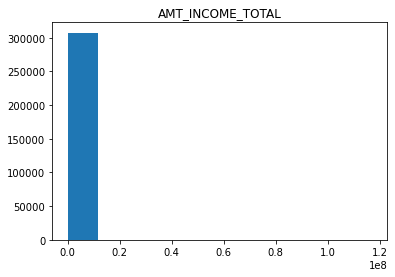

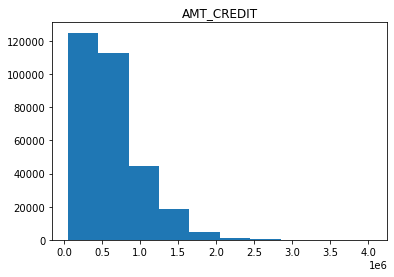

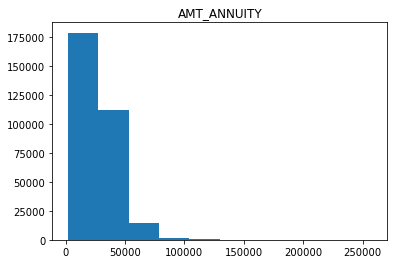

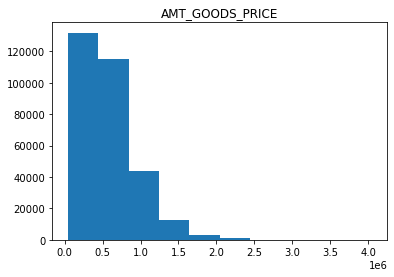

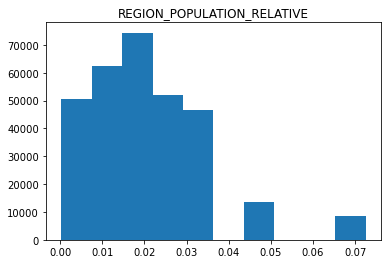

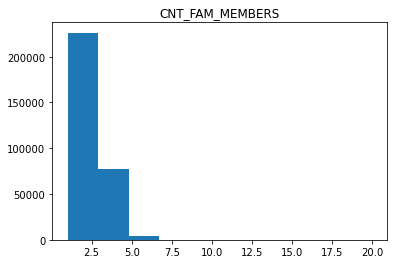

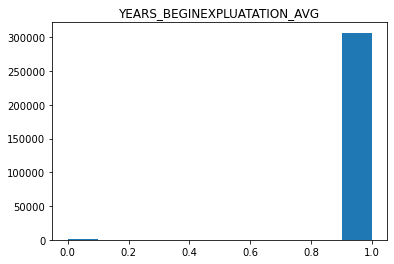

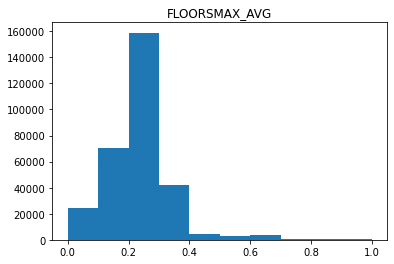

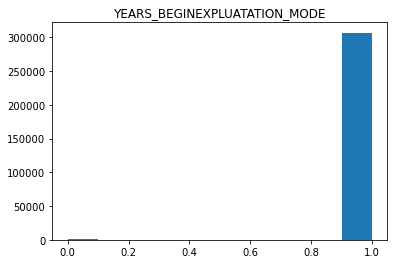

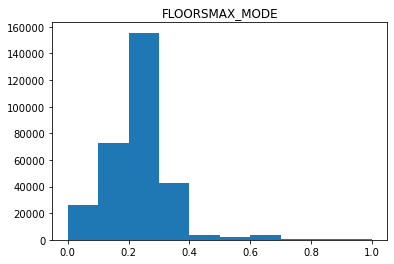

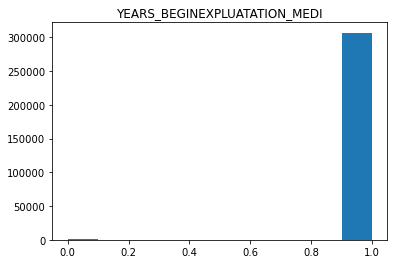

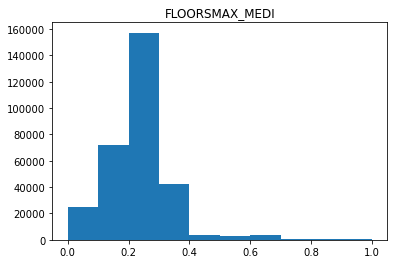

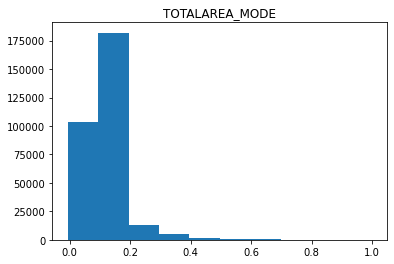

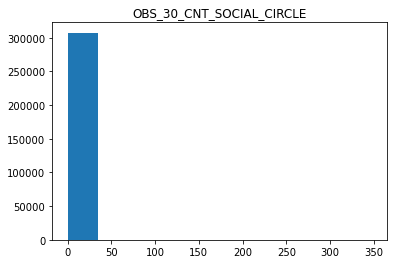

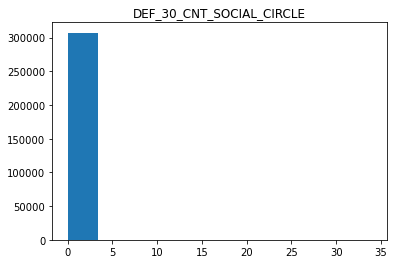

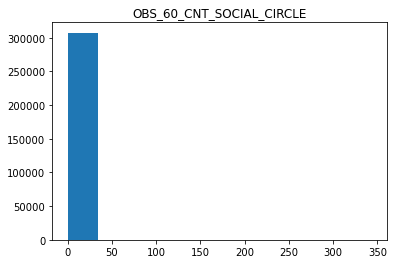

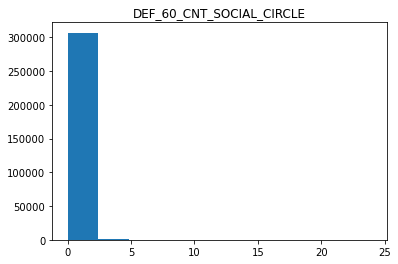

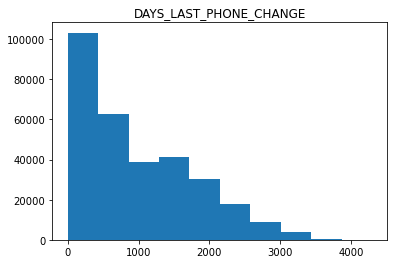

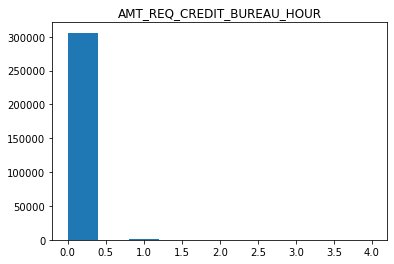

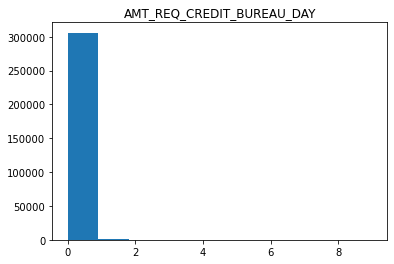

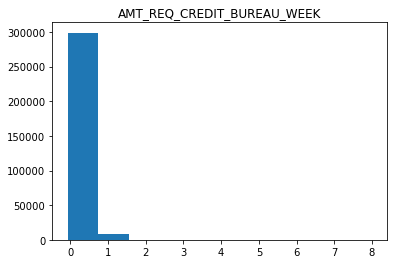

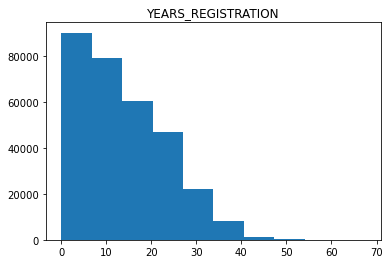

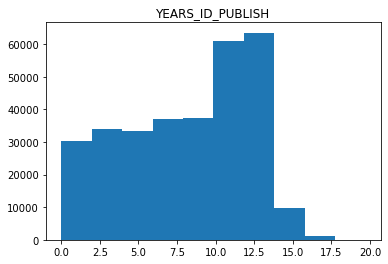

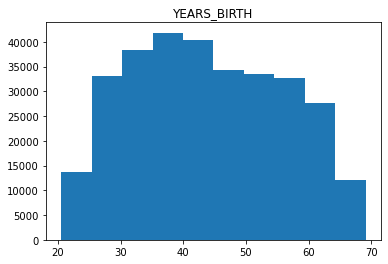

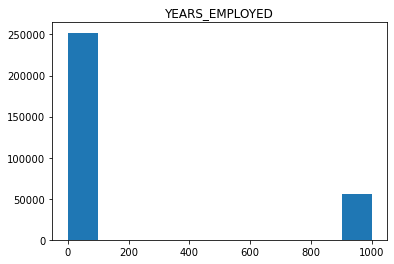

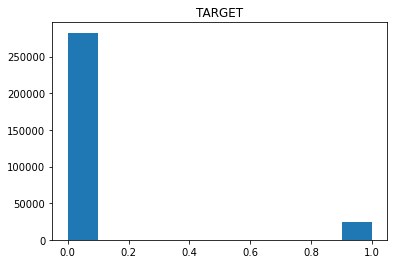

In [142]:
for col in num_app_data.columns:
    plt.hist(num_app_data[col])
    plt.title(col)
    plt.show()
